In [1]:
import math
import numpy as np

In [2]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [3]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [4]:
import math
def InitialDataEqualMassConic(radius,ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([math.pi+orbitalangle,orbitalangle])
    orbitalradius=radius #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [5]:
import random,numpy as np
rad0=50.
ecc0=0.5
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.5
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50.0, 0.5, array([1., 1.]))


In [6]:
def getxyuveqtwoellipses(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, eccentricity, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ux0=0.
    uy0=0.
    uz0=0.
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    #masses=np.zeros(2)
    #masses[0]=masses[1]+masses[0]
    #masses[1]=(masses[1]*masses[0])/(masses[1]+masses[0])
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius #NO REDUCED MASS 
        #focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        coordsep=orbitalr*(1+eccentricity) #start at aphelion
        x0=(coordsep)*cosphi
        y0=(coordsep)*sinphi
        starsep=np.sqrt((x0[0]-x0[1])**2+(y0[0]-y0[1])**2) #two stars, at opposite ends of the orbit
        Fapastron=masses[1]*masses[0]/starsep**2
        #print('xycomp',coordsep,focusdisp,x0,y0)
        #x0[0]=0.0
        #y0[0]=0.0
        v=np.zeros(2)
        #v= np.sqrt(masses[1]*masses[0]/masses*(2./coordsep-1./(orbitalr)))
        v= np.sqrt(masses[1]*masses[0]/masses*(1./orbitalr-2./starsep))
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        print("vstuff", coordsep,orbitalr, 2./coordsep, 1./orbitalr, (2./starsep-1./(2.*orbitalr)), 1./(coordsep))
        
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v[0]*sinphi
        uy0=v[1]*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a[0]*cosphi
        ay0=-a[1]*sinphi
        az0=np.zeros(2)

    statevec=[]
    avec=[]
    for i in np.arange(len(x0)):
        stateveci=np.array([x0[i],y0[i],z0[i],ux0[i],uy0[i],uz0[i]])
        aveci=np.array([ax0[i],ay0[i],az0[i]])
        statevec.append(stateveci)
        avec.append(aveci)
    statevecnp=np.array(statevec)
    avecnp=np.array(avec)
    return masses, statevecnp,avecnp

In [7]:
xyuvaeqellipse=getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50.0 [3.66519143 0.52359878] 0.5 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50.0
[-43.30127019  43.30127019]
[-25.  25.]
0.5
vstuff 75.0 50.0 0.02666666666666667 0.02 0.003333333333333334 0.013333333333333334
(array([1., 1.]), array([[-6.49519053e+01, -3.75000000e+01,  0.00000000e+00,
         4.08248290e-02, -7.07106781e-02,  0.00000000e+00],
       [ 6.49519053e+01,  3.75000000e+01,  0.00000000e+00,
        -4.08248290e-02,  7.07106781e-02,  0.00000000e+00]]), array([[ 3.84900179e-05,  2.22222222e-05,  0.00000000e+00],
       [-3.84900179e-05, -2.22222222e-05,  0.00000000e+00]]))


In [8]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [9]:
class OrbitDiffEq:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    axii[j]-=Gconstant*self.masses[k]*(xvec[j,0]  - xvec[k,0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    ayii[j]-=Gconstant*self.masses[k]*(xvec[j,1]  - xvec[k,1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    azii[j]-=Gconstant*self.masses[k]*(xvec[j,2]  - xvec[k,2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)
        #xii = intvalx
        #tnew,intvalvx=RK4implicit(h,self.ti,self.vxi,self.dvxidt)
        #vxii=intvalvx
        #tnew,intvaly=RK4implicit(h,self.ti,self.yi,self.dyidt)
        #yii = intvaly
        #tnew,intvalvy=RK4implicit(h,self.ti,self.vyi,self.dvyidt)
        #vyii=intvalvy
        #tnew,intvalz=RK4implicit(h,self.ti,self.zi,self.dzidt)
        #zii = intvalz
        #tnew,intvalvz=RK4implicit(h,self.ti,self.vzi,self.dvzidt)
        #vzii=intvalvz
        #axii=self.dvxidt(self.ti,np.zeros(np.shape(self.xi)))
        #ayii=self.dvyidt(self.ti,np.zeros(np.shape(self.yi)))
        #azii=self.dvzidt(self.ti,np.zeros(np.shape(self.zi)))
 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [10]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-6.49519053e+01 -3.75000000e+01  0.00000000e+00  4.08248290e-02
  -7.07106781e-02  0.00000000e+00]
 [ 6.49519053e+01  3.75000000e+01  0.00000000e+00 -4.08248290e-02
   7.07106781e-02  0.00000000e+00]] 0.0
[1. 1.] [[-6.49519053e+01 -3.75000000e+01  0.00000000e+00  4.08248290e-02
  -7.07106781e-02  0.00000000e+00]
 [ 6.49519053e+01  3.75000000e+01  0.00000000e+00 -4.08248290e-02
   7.07106781e-02  0.00000000e+00]] 0.0


In [11]:
dt=1 #natural units #*31556926 #seconds per year
numsteps=8000
masses,xvec0,avec0=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec0,avec0,0.0)
ODEeq.print2D()
t=0.0
star1x=[]
star2x=[]
star1a=[]
star2a=[]
times=[]
for i in np.arange(1,numsteps):
    masses,xvec,avec,t=ODEeq.timestepRK4ODE(i,dt)
    ODEeq.print2D()
    star1x.append(xvec[0])
    star2x.append(xvec[1])
    star1a.append(avec[0])
    star2a.append(avec[1])
    times.append(t)



[1. 1.] [[-6.49519053e+01 -3.75000000e+01  0.00000000e+00  4.08248290e-02
  -7.07106781e-02  0.00000000e+00]
 [ 6.49519053e+01  3.75000000e+01  0.00000000e+00 -4.08248290e-02
   7.07106781e-02  0.00000000e+00]] 0.0
[1. 1.] [[-6.49110612e+01 -3.75706996e+01  0.00000000e+00  4.08633070e-02
  -7.06884350e-02  0.00000000e+00]
 [ 6.49110612e+01  3.75706996e+01  0.00000000e+00 -4.08633070e-02
   7.06884350e-02  0.00000000e+00]] 1.0
[1. 1.] [[-6.48701787e+01 -3.76413769e+01  0.00000000e+00  4.09017606e-02
  -7.06661499e-02  0.00000000e+00]
 [ 6.48701787e+01  3.76413769e+01  0.00000000e+00 -4.09017606e-02
   7.06661499e-02  0.00000000e+00]] 2.0
[1. 1.] [[-6.48292577e+01 -3.77120318e+01  0.00000000e+00  4.09401898e-02
  -7.06438231e-02  0.00000000e+00]
 [ 6.48292577e+01  3.77120318e+01  0.00000000e+00 -4.09401898e-02
   7.06438231e-02  0.00000000e+00]] 3.0
[1. 1.] [[-6.47882983e+01 -3.77826645e+01  0.00000000e+00  4.09785946e-02
  -7.06214546e-02  0.00000000e+00]
 [ 6.47882983e+01  3.77826645e+

   6.77058206e-02  0.00000000e+00]] 122.0
[1. 1.] [[-5.96476289e+01 -4.60168752e+01  0.00000000e+00  4.53493769e-02
  -6.76789306e-02  0.00000000e+00]
 [ 5.96476289e+01  4.60168752e+01  0.00000000e+00 -4.53493769e-02
   6.76789306e-02  0.00000000e+00]] 123.0
[1. 1.] [[-5.96022621e+01 -4.60845407e+01  0.00000000e+00  4.53842369e-02
  -6.76520069e-02  0.00000000e+00]
 [ 5.96022621e+01  4.60845407e+01  0.00000000e+00 -4.53842369e-02
   6.76520069e-02  0.00000000e+00]] 124.0
[1. 1.] [[-5.95568604e+01 -4.61521792e+01  0.00000000e+00  4.54190628e-02
  -6.76250495e-02  0.00000000e+00]
 [ 5.95568604e+01  4.61521792e+01  0.00000000e+00 -4.54190628e-02
   6.76250495e-02  0.00000000e+00]] 125.0
[1. 1.] [[-5.95114240e+01 -4.62197908e+01  0.00000000e+00  4.54538544e-02
  -6.75980585e-02  0.00000000e+00]
 [ 5.95114240e+01  4.62197908e+01  0.00000000e+00 -4.54538544e-02
   6.75980585e-02  0.00000000e+00]] 126.0
[1. 1.] [[-5.94659527e+01 -4.62873753e+01  0.00000000e+00  4.54886118e-02
  -6.75710340e-0

   6.54839083e-02  0.00000000e+00]] 201.0
[1. 1.] [[-5.59590967e+01 -5.12769046e+01  0.00000000e+00  4.79932224e-02
  -6.54546032e-02  0.00000000e+00]
 [ 5.59590967e+01  5.12769046e+01  0.00000000e+00 -4.79932224e-02
   6.54546032e-02  0.00000000e+00]] 202.0
[1. 1.] [[-5.59110875e+01 -5.13423446e+01  0.00000000e+00  4.80251989e-02
  -6.54252709e-02  0.00000000e+00]
 [ 5.59110875e+01  5.13423446e+01  0.00000000e+00 -4.80251989e-02
   6.54252709e-02  0.00000000e+00]] 203.0
[1. 1.] [[-5.58630463e+01 -5.14077552e+01  0.00000000e+00  4.80571368e-02
  -6.53959116e-02  0.00000000e+00]
 [ 5.58630463e+01  5.14077552e+01  0.00000000e+00 -4.80571368e-02
   6.53959116e-02  0.00000000e+00]] 204.0
[1. 1.] [[-5.58149732e+01 -5.14731364e+01  0.00000000e+00  4.80890359e-02
  -6.53665253e-02  0.00000000e+00]
 [ 5.58149732e+01  5.14731364e+01  0.00000000e+00 -4.80890359e-02
   6.53665253e-02  0.00000000e+00]] 205.0
[1. 1.] [[-5.57668682e+01 -5.15384882e+01  0.00000000e+00  4.81208963e-02
  -6.53371120e-0

   6.24962893e-02  0.00000000e+00]] 299.0
[1. 1.] [[-5.11083371e+01 -5.75467430e+01  0.00000000e+00  5.09369435e-02
  -6.24647433e-02  0.00000000e+00]
 [ 5.11083371e+01  5.75467430e+01  0.00000000e+00 -5.09369435e-02
   6.24647433e-02  0.00000000e+00]] 300.0
[1. 1.] [[-5.10573862e+01 -5.76091920e+01  0.00000000e+00  5.09649474e-02
  -6.24331788e-02  0.00000000e+00]
 [ 5.10573862e+01  5.76091920e+01  0.00000000e+00 -5.09649474e-02
   6.24331788e-02  0.00000000e+00]] 301.0
[1. 1.] [[-5.10064072e+01 -5.76716094e+01  0.00000000e+00  5.09929092e-02
  -6.24015960e-02  0.00000000e+00]
 [ 5.10064072e+01  5.76716094e+01  0.00000000e+00 -5.09929092e-02
   6.24015960e-02  0.00000000e+00]] 302.0
[1. 1.] [[-5.09554004e+01 -5.77339952e+01  0.00000000e+00  5.10208290e-02
  -6.23699949e-02  0.00000000e+00]
 [ 5.09554004e+01  5.77339952e+01  0.00000000e+00 -5.10208290e-02
   6.23699949e-02  0.00000000e+00]] 303.0
[1. 1.] [[-5.09043656e+01 -5.77963494e+01  0.00000000e+00  5.10487067e-02
  -6.23383758e-0

[1. 1.] [[-4.75292916e+01 -6.17807700e+01  0.00000000e+00  5.27697302e-02
  -6.02485266e-02  0.00000000e+00]
 [ 4.75292916e+01  6.17807700e+01  0.00000000e+00 -5.27697302e-02
   6.02485266e-02  0.00000000e+00]] 369.0
[1. 1.] [[-4.74765093e+01 -6.18410022e+01  0.00000000e+00  5.27947979e-02
  -6.02159085e-02  0.00000000e+00]
 [ 4.74765093e+01  6.18410022e+01  0.00000000e+00 -5.27947979e-02
   6.02159085e-02  0.00000000e+00]] 370.0
[1. 1.] [[-4.74237020e+01 -6.19012018e+01  0.00000000e+00  5.28198227e-02
  -6.01832782e-02  0.00000000e+00]
 [ 4.74237020e+01  6.19012018e+01  0.00000000e+00 -5.28198227e-02
   6.01832782e-02  0.00000000e+00]] 371.0
[1. 1.] [[-4.73708697e+01 -6.19613688e+01  0.00000000e+00  5.28448046e-02
  -6.01506358e-02  0.00000000e+00]
 [ 4.73708697e+01  6.19613688e+01  0.00000000e+00 -5.28448046e-02
   6.01506358e-02  0.00000000e+00]] 372.0
[1. 1.] [[-4.73180124e+01 -6.20215031e+01  0.00000000e+00  5.28697436e-02
  -6.01179814e-02  0.00000000e+00]
 [ 4.73180124e+01  6.20

[1. 1.] [[-4.27384614e+01 -6.70125142e+01  0.00000000e+00  5.48328331e-02
  -5.73075930e-02  0.00000000e+00]
 [ 4.27384614e+01  6.70125142e+01  0.00000000e+00 -5.48328331e-02
   5.73075930e-02  0.00000000e+00]] 458.0
[1. 1.] [[-4.26836179e+01 -6.70698052e+01  0.00000000e+00  5.48540916e-02
  -5.72742246e-02  0.00000000e+00]
 [ 4.26836179e+01  6.70698052e+01  0.00000000e+00 -5.48540916e-02
   5.72742246e-02  0.00000000e+00]] 459.0
[1. 1.] [[-4.26287532e+01 -6.71270627e+01  0.00000000e+00  5.48753077e-02
  -5.72408516e-02  0.00000000e+00]
 [ 4.26287532e+01  6.71270627e+01  0.00000000e+00 -5.48753077e-02
   5.72408516e-02  0.00000000e+00]] 460.0
[1. 1.] [[-4.25738673e+01 -6.71842869e+01  0.00000000e+00  5.48964815e-02
  -5.72074738e-02  0.00000000e+00]
 [ 4.25738673e+01  6.71842869e+01  0.00000000e+00 -5.48964815e-02
   5.72074738e-02  0.00000000e+00]] 461.0
[1. 1.] [[-4.25189602e+01 -6.72414776e+01  0.00000000e+00  5.49176128e-02
  -5.71740915e-02  0.00000000e+00]
 [ 4.25189602e+01  6.72

[1. 1.] [[-3.94677308e+01 -7.03354631e+01  0.00000000e+00  5.60150746e-02
  -5.53332584e-02  0.00000000e+00]
 [ 3.94677308e+01  7.03354631e+01  0.00000000e+00 -5.60150746e-02
   5.53332584e-02  0.00000000e+00]] 517.0
[1. 1.] [[-3.94117063e+01 -7.03907796e+01  0.00000000e+00  5.60338616e-02
  -5.52997411e-02  0.00000000e+00]
 [ 3.94117063e+01  7.03907796e+01  0.00000000e+00 -5.60338616e-02
   5.52997411e-02  0.00000000e+00]] 518.0
[1. 1.] [[-3.93556631e+01 -7.04460625e+01  0.00000000e+00  5.60526073e-02
  -5.52662236e-02  0.00000000e+00]
 [ 3.93556631e+01  7.04460625e+01  0.00000000e+00 -5.60526073e-02
   5.52662236e-02  0.00000000e+00]] 519.0
[1. 1.] [[-3.92996011e+01 -7.05013120e+01  0.00000000e+00  5.60713118e-02
  -5.52327059e-02  0.00000000e+00]
 [ 3.92996011e+01  7.05013120e+01  0.00000000e+00 -5.60713118e-02
   5.52327059e-02  0.00000000e+00]] 520.0
[1. 1.] [[-3.92435205e+01 -7.05565279e+01  0.00000000e+00  5.60899751e-02
  -5.51991879e-02  0.00000000e+00]
 [ 3.92435205e+01  7.05

   5.26231747e-02  0.00000000e+00]] 598.0
[1. 1.] [[-3.48150061e+01 -7.47602006e+01  0.00000000e+00  5.74210392e-02
  -5.25898500e-02  0.00000000e+00]
 [ 3.48150061e+01  7.47602006e+01  0.00000000e+00 -5.74210392e-02
   5.25898500e-02  0.00000000e+00]] 599.0
[1. 1.] [[-3.47575773e+01 -7.48127738e+01  0.00000000e+00  5.74365376e-02
  -5.25565302e-02  0.00000000e+00]
 [ 3.47575773e+01  7.48127738e+01  0.00000000e+00 -5.74365376e-02
   5.25565302e-02  0.00000000e+00]] 600.0
[1. 1.] [[-3.47001330e+01 -7.48653137e+01  0.00000000e+00  5.74519972e-02
  -5.25232154e-02  0.00000000e+00]
 [ 3.47001330e+01  7.48653137e+01  0.00000000e+00 -5.74519972e-02
   5.25232154e-02  0.00000000e+00]] 601.0
[1. 1.] [[-3.46426733e+01 -7.49178202e+01  0.00000000e+00  5.74674181e-02
  -5.24899057e-02  0.00000000e+00]
 [ 3.46426733e+01  7.49178202e+01  0.00000000e+00 -5.74674181e-02
   5.24899057e-02  0.00000000e+00]] 602.0
[1. 1.] [[-3.45851982e+01 -7.49702935e+01  0.00000000e+00  5.74828003e-02
  -5.24566012e-0

[1. 1.] [[-3.26221547e+01 -7.67346066e+01  0.00000000e+00  5.79830136e-02
  -5.13277138e-02  0.00000000e+00]
 [ 3.26221547e+01  7.67346066e+01  0.00000000e+00 -5.79830136e-02
   5.13277138e-02  0.00000000e+00]] 637.0
[1. 1.] [[-3.25641647e+01 -7.67859178e+01  0.00000000e+00  5.79970634e-02
  -5.12946249e-02  0.00000000e+00]
 [ 3.25641647e+01  7.67859178e+01  0.00000000e+00 -5.79970634e-02
   5.12946249e-02  0.00000000e+00]] 638.0
[1. 1.] [[-3.25061606e+01 -7.68371959e+01  0.00000000e+00  5.80110759e-02
  -5.12615432e-02  0.00000000e+00]
 [ 3.25061606e+01  7.68371959e+01  0.00000000e+00 -5.80110759e-02
   5.12615432e-02  0.00000000e+00]] 639.0
[1. 1.] [[-3.24481425e+01 -7.68884409e+01  0.00000000e+00  5.80250510e-02
  -5.12284687e-02  0.00000000e+00]
 [ 3.24481425e+01  7.68884409e+01  0.00000000e+00 -5.80250510e-02
   5.12284687e-02  0.00000000e+00]] 640.0
[1. 1.] [[-3.23901105e+01 -7.69396528e+01  0.00000000e+00  5.80389888e-02
  -5.11954014e-02  0.00000000e+00]
 [ 3.23901105e+01  7.69

   4.98792462e-02  0.00000000e+00]] 681.0
[1. 1.] [[-2.99992365e+01 -7.90109643e+01  0.00000000e+00  5.85787917e-02
  -4.98465199e-02  0.00000000e+00]
 [ 2.99992365e+01  7.90109643e+01  0.00000000e+00 -5.85787917e-02
   4.98465199e-02  0.00000000e+00]] 682.0
[1. 1.] [[-2.99406515e+01 -7.90607945e+01  0.00000000e+00  5.85911977e-02
  -4.98138030e-02  0.00000000e+00]
 [ 2.99406515e+01  7.90607945e+01  0.00000000e+00 -5.85911977e-02
   4.98138030e-02  0.00000000e+00]] 683.0
[1. 1.] [[-2.98820541e+01 -7.91105919e+01  0.00000000e+00  5.86035682e-02
  -4.97810954e-02  0.00000000e+00]
 [ 2.98820541e+01  7.91105919e+01  0.00000000e+00 -5.86035682e-02
   4.97810954e-02  0.00000000e+00]] 684.0
[1. 1.] [[-2.98234444e+01 -7.91603566e+01  0.00000000e+00  5.86159031e-02
  -4.97483972e-02  0.00000000e+00]
 [ 2.98234444e+01  7.91603566e+01  0.00000000e+00 -5.86159031e-02
   4.97483972e-02  0.00000000e+00]] 685.0
[1. 1.] [[-2.97648223e+01 -7.92100887e+01  0.00000000e+00  5.86282026e-02
  -4.97157086e-0

[1. 1.] [[-2.36075142e+01 -8.42057592e+01  0.00000000e+00  5.97216296e-02
  -4.63758781e-02  0.00000000e+00]
 [ 2.36075142e+01  8.42057592e+01  0.00000000e+00 -5.97216296e-02
   4.63758781e-02  0.00000000e+00]] 790.0
[1. 1.] [[-2.35477882e+01 -8.42521193e+01  0.00000000e+00  5.97304383e-02
  -4.63444098e-02  0.00000000e+00]
 [ 2.35477882e+01  8.42521193e+01  0.00000000e+00 -5.97304383e-02
   4.63444098e-02  0.00000000e+00]] 791.0
[1. 1.] [[-2.34880534e+01 -8.42984480e+01  0.00000000e+00  5.97392161e-02
  -4.63129550e-02  0.00000000e+00]
 [ 2.34880534e+01  8.42984480e+01  0.00000000e+00 -5.97392161e-02
   4.63129550e-02  0.00000000e+00]] 792.0
[1. 1.] [[-2.34283098e+01 -8.43447452e+01  0.00000000e+00  5.97479630e-02
  -4.62815137e-02  0.00000000e+00]
 [ 2.34283098e+01  8.43447452e+01  0.00000000e+00 -5.97479630e-02
   4.62815137e-02  0.00000000e+00]] 793.0
[1. 1.] [[-2.33685575e+01 -8.43910110e+01  0.00000000e+00  5.97566791e-02
  -4.62500860e-02  0.00000000e+00]
 [ 2.33685575e+01  8.43

[1. 1.] [[-1.99492229e+01 -8.69766549e+01  0.00000000e+00  6.02039934e-02
  -4.44820533e-02  0.00000000e+00]
 [ 1.99492229e+01  8.69766549e+01  0.00000000e+00 -6.02039934e-02
   4.44820533e-02  0.00000000e+00]] 851.0
[1. 1.] [[-1.98890154e+01 -8.70211216e+01  0.00000000e+00  6.02109981e-02
  -4.44514599e-02  0.00000000e+00]
 [ 1.98890154e+01  8.70211216e+01  0.00000000e+00 -6.02109981e-02
   4.44514599e-02  0.00000000e+00]] 852.0
[1. 1.] [[-1.98288009e+01 -8.70655578e+01  0.00000000e+00  6.02179745e-02
  -4.44208817e-02  0.00000000e+00]
 [ 1.98288009e+01  8.70655578e+01  0.00000000e+00 -6.02179745e-02
   4.44208817e-02  0.00000000e+00]] 853.0
[1. 1.] [[-1.97685795e+01 -8.71099634e+01  0.00000000e+00  6.02249228e-02
  -4.43903185e-02  0.00000000e+00]
 [ 1.97685795e+01  8.71099634e+01  0.00000000e+00 -6.02249228e-02
   4.43903185e-02  0.00000000e+00]] 854.0
[1. 1.] [[-1.97083511e+01 -8.71543384e+01  0.00000000e+00  6.02318429e-02
  -4.43597706e-02  0.00000000e+00]
 [ 1.97083511e+01  8.71

[1. 1.] [[-1.51734538e+01 -9.03965226e+01  0.00000000e+00  6.06739964e-02
  -4.21134226e-02  0.00000000e+00]
 [ 1.51734538e+01  9.03965226e+01  0.00000000e+00 -6.06739964e-02
   4.21134226e-02  0.00000000e+00]] 930.0
[1. 1.] [[-1.51127774e+01 -9.04386213e+01  0.00000000e+00  6.06789097e-02
  -4.20840858e-02  0.00000000e+00]
 [ 1.51127774e+01  9.04386213e+01  0.00000000e+00 -6.06789097e-02
   4.20840858e-02  0.00000000e+00]] 931.0
[1. 1.] [[-1.50520960e+01 -9.04806908e+01  0.00000000e+00  6.06837983e-02
  -4.20547655e-02  0.00000000e+00]
 [ 1.50520960e+01  9.04806908e+01  0.00000000e+00 -6.06837983e-02
   4.20547655e-02  0.00000000e+00]] 932.0
[1. 1.] [[-1.49914098e+01 -9.05227309e+01  0.00000000e+00  6.06886622e-02
  -4.20254619e-02  0.00000000e+00]
 [ 1.49914098e+01  9.05227309e+01  0.00000000e+00 -6.06886622e-02
   4.20254619e-02  0.00000000e+00]] 933.0
[1. 1.] [[-1.49307187e+01 -9.05647417e+01  0.00000000e+00  6.06935015e-02
  -4.19961749e-02  0.00000000e+00]
 [ 1.49307187e+01  9.05

[1. 1.] [[-1.15859413e+01 -9.28307132e+01  0.00000000e+00  6.09229498e-02
  -4.04113455e-02  0.00000000e+00]
 [ 1.15859413e+01  9.28307132e+01  0.00000000e+00 -6.09229498e-02
   4.04113455e-02  0.00000000e+00]] 989.0
[1. 1.] [[-1.15250166e+01 -9.28711104e+01  0.00000000e+00  6.09264764e-02
  -4.03830084e-02  0.00000000e+00]
 [ 1.15250166e+01  9.28711104e+01  0.00000000e+00 -6.09264764e-02
   4.03830084e-02  0.00000000e+00]] 990.0
[1. 1.] [[-1.14640884e+01 -9.29114793e+01  0.00000000e+00  6.09299807e-02
  -4.03546886e-02  0.00000000e+00]
 [ 1.14640884e+01  9.29114793e+01  0.00000000e+00 -6.09299807e-02
   4.03546886e-02  0.00000000e+00]] 991.0
[1. 1.] [[-1.14031567e+01 -9.29518198e+01  0.00000000e+00  6.09334629e-02
  -4.03263860e-02  0.00000000e+00]
 [ 1.14031567e+01  9.29518198e+01  0.00000000e+00 -6.09334629e-02
   4.03263860e-02  0.00000000e+00]] 992.0
[1. 1.] [[-1.13422215e+01 -9.29921320e+01  0.00000000e+00  6.09369228e-02
  -4.02981008e-02  0.00000000e+00]
 [ 1.13422215e+01  9.29

[1. 1.] [[-4.50057553e+00 -9.73322607e+01  0.00000000e+00  6.11936702e-02
  -3.72410357e-02  0.00000000e+00]
 [ 4.50057553e+00  9.73322607e+01  0.00000000e+00 -6.11936702e-02
   3.72410357e-02  0.00000000e+00]] 1105.0
[1. 1.] [[-4.43938126e+00 -9.73694886e+01  0.00000000e+00  6.11948776e-02
  -3.72147398e-02  0.00000000e+00]
 [ 4.43938126e+00  9.73694886e+01  0.00000000e+00 -6.11948776e-02
   3.72147398e-02  0.00000000e+00]] 1106.0
[1. 1.] [[-4.37818578e+00 -9.74066902e+01  0.00000000e+00  6.11960672e-02
  -3.71884617e-02  0.00000000e+00]
 [ 4.37818578e+00  9.74066902e+01  0.00000000e+00 -6.11960672e-02
   3.71884617e-02  0.00000000e+00]] 1107.0
[1. 1.] [[-4.31698913e+00 -9.74438655e+01  0.00000000e+00  6.11972391e-02
  -3.71622013e-02  0.00000000e+00]
 [ 4.31698913e+00  9.74438655e+01  0.00000000e+00 -6.11972391e-02
   3.71622013e-02  0.00000000e+00]] 1108.0
[1. 1.] [[-4.25579131e+00 -9.74810146e+01  0.00000000e+00  6.11983932e-02
  -3.71359587e-02  0.00000000e+00]
 [ 4.25579131e+00  

[1. 1.] [[-1.53785170e-01 -9.99111332e+01  0.00000000e+00  6.12371952e-02
  -3.54181774e-02  0.00000000e+00]
 [ 1.53785170e-01  9.99111332e+01  0.00000000e+00 -6.12371952e-02
   3.54181774e-02  0.00000000e+00]] 1176.0
[1. 1.] [[-9.25479585e-02 -9.99465388e+01  0.00000000e+00  6.12372261e-02
  -3.53931418e-02  0.00000000e+00]
 [ 9.25479585e-02  9.99465388e+01  0.00000000e+00 -6.12372261e-02
   3.53931418e-02  0.00000000e+00]] 1177.0
[1. 1.] [[-3.13107234e-02 -9.99819195e+01  0.00000000e+00  6.12372416e-02
  -3.53681239e-02  0.00000000e+00]
 [ 3.13107234e-02  9.99819195e+01  0.00000000e+00 -6.12372416e-02
   3.53681239e-02  0.00000000e+00]] 1178.0
[1. 1.] [[ 2.99265195e-02 -1.00017275e+02  0.00000000e+00  6.12372417e-02
  -3.53431237e-02  0.00000000e+00]
 [-2.99265195e-02  1.00017275e+02  0.00000000e+00 -6.12372417e-02
   3.53431237e-02  0.00000000e+00]] 1179.0
[1. 1.] [[ 9.11637550e-02 -1.00052606e+02  0.00000000e+00  6.12372266e-02
  -3.53181412e-02  0.00000000e+00]
 [-9.11637550e-02  

   3.29549290e-02  0.00000000e+00]] 1278.0
[1. 1.] [[ 6.15119564e+00 -1.03429560e+02  0.00000000e+00  6.11652367e-02
  -3.29316743e-02  0.00000000e+00]
 [-6.15119564e+00  1.03429560e+02  0.00000000e+00 -6.11652367e-02
   3.29316743e-02  0.00000000e+00]] 1279.0
[1. 1.] [[ 6.21236018e+00 -1.03462480e+02  0.00000000e+00  6.11638481e-02
  -3.29084367e-02  0.00000000e+00]
 [-6.21236018e+00  1.03462480e+02  0.00000000e+00 -6.11638481e-02
   3.29084367e-02  0.00000000e+00]] 1280.0
[1. 1.] [[ 6.27352333e+00 -1.03495377e+02  0.00000000e+00  6.11624472e-02
  -3.28852164e-02  0.00000000e+00]
 [-6.27352333e+00  1.03495377e+02  0.00000000e+00 -6.11624472e-02
   3.28852164e-02  0.00000000e+00]] 1281.0
[1. 1.] [[ 6.33468507e+00 -1.03528251e+02  0.00000000e+00  6.11610340e-02
  -3.28620131e-02  0.00000000e+00]
 [-6.33468507e+00  1.03528251e+02  0.00000000e+00 -6.11610340e-02
   3.28620131e-02  0.00000000e+00]] 1282.0
[1. 1.] [[ 6.39584539e+00 -1.03561101e+02  0.00000000e+00  6.11596087e-02
  -3.283882

[1. 1.] [[ 9.69606731e+00 -1.05301052e+02  0.00000000e+00  6.10652670e-02
  -3.16120451e-02  0.00000000e+00]
 [-9.69606731e+00  1.05301052e+02  0.00000000e+00 -6.10652670e-02
   3.16120451e-02  0.00000000e+00]] 1337.0
[1. 1.] [[ 9.75713155e+00 -1.05332653e+02  0.00000000e+00  6.10632117e-02
  -3.15897909e-02  0.00000000e+00]
 [-9.75713155e+00  1.05332653e+02  0.00000000e+00 -6.10632117e-02
   3.15897909e-02  0.00000000e+00]] 1338.0
[1. 1.] [[ 9.81819373e+00 -1.05364232e+02  0.00000000e+00  6.10611457e-02
  -3.15675535e-02  0.00000000e+00]
 [-9.81819373e+00  1.05364232e+02  0.00000000e+00 -6.10611457e-02
   3.15675535e-02  0.00000000e+00]] 1339.0
[1. 1.] [[ 9.87925383e+00 -1.05395788e+02  0.00000000e+00  6.10590690e-02
  -3.15453328e-02  0.00000000e+00]
 [-9.87925383e+00  1.05395788e+02  0.00000000e+00 -6.10590690e-02
   3.15453328e-02  0.00000000e+00]] 1340.0
[1. 1.] [[ 9.94031186e+00 -1.05427323e+02  0.00000000e+00  6.10569816e-02
  -3.15231288e-02  0.00000000e+00]
 [-9.94031186e+00  

[1. 1.] [[ 1.46347204e+01 -1.07790063e+02  0.00000000e+00  6.08660917e-02
  -2.98629194e-02  0.00000000e+00]
 [-1.46347204e+01  1.07790063e+02  0.00000000e+00 -6.08660917e-02
   2.98629194e-02  0.00000000e+00]] 1418.0
[1. 1.] [[ 1.46955851e+01 -1.07819915e+02  0.00000000e+00  6.08632448e-02
  -2.98419919e-02  0.00000000e+00]
 [-1.46955851e+01  1.07819915e+02  0.00000000e+00 -6.08632448e-02
   2.98419919e-02  0.00000000e+00]] 1419.0
[1. 1.] [[ 1.47564469e+01 -1.07849747e+02  0.00000000e+00  6.08603891e-02
  -2.98210804e-02  0.00000000e+00]
 [-1.47564469e+01  1.07849747e+02  0.00000000e+00 -6.08603891e-02
   2.98210804e-02  0.00000000e+00]] 1420.0
[1. 1.] [[ 1.48173059e+01 -1.07879557e+02  0.00000000e+00  6.08575246e-02
  -2.98001849e-02  0.00000000e+00]
 [-1.48173059e+01  1.07879557e+02  0.00000000e+00 -6.08575246e-02
   2.98001849e-02  0.00000000e+00]] 1421.0
[1. 1.] [[ 1.48781620e+01 -1.07909347e+02  0.00000000e+00  6.08546513e-02
  -2.97793054e-02  0.00000000e+00]
 [-1.48781620e+01  

[1. 1.] [[ 1.83419407e+01 -1.09573350e+02  0.00000000e+00  6.06770176e-02
  -2.86152790e-02  0.00000000e+00]
 [-1.83419407e+01  1.09573350e+02  0.00000000e+00 -6.06770176e-02
   2.86152790e-02  0.00000000e+00]] 1479.0
[1. 1.] [[ 1.84026161e+01 -1.09601956e+02  0.00000000e+00  6.06736697e-02
  -2.85953098e-02  0.00000000e+00]
 [-1.84026161e+01  1.09601956e+02  0.00000000e+00 -6.06736697e-02
   2.85953098e-02  0.00000000e+00]] 1480.0
[1. 1.] [[ 1.84632881e+01 -1.09630541e+02  0.00000000e+00  6.06703143e-02
  -2.85753561e-02  0.00000000e+00]
 [-1.84632881e+01  1.09630541e+02  0.00000000e+00 -6.06703143e-02
   2.85753561e-02  0.00000000e+00]] 1481.0
[1. 1.] [[ 1.85239567e+01 -1.09659106e+02  0.00000000e+00  6.06669514e-02
  -2.85554177e-02  0.00000000e+00]
 [-1.85239567e+01  1.09659106e+02  0.00000000e+00 -6.06669514e-02
   2.85554177e-02  0.00000000e+00]] 1482.0
[1. 1.] [[ 1.85846220e+01 -1.09687652e+02  0.00000000e+00  6.06635808e-02
  -2.85354947e-02  0.00000000e+00]
 [-1.85846220e+01  

[1. 1.] [[ 2.54766135e+01 -1.12815011e+02  0.00000000e+00  6.02344556e-02
  -2.63624689e-02  0.00000000e+00]
 [-2.54766135e+01  1.12815011e+02  0.00000000e+00 -6.02344556e-02
   2.63624689e-02  0.00000000e+00]] 1597.0
[1. 1.] [[ 2.55368459e+01 -1.12841365e+02  0.00000000e+00  6.02303358e-02
  -2.63442453e-02  0.00000000e+00]
 [-2.55368459e+01  1.12841365e+02  0.00000000e+00 -6.02303358e-02
   2.63442453e-02  0.00000000e+00]] 1598.0
[1. 1.] [[ 2.55970742e+01 -1.12867700e+02  0.00000000e+00  6.02262105e-02
  -2.63260358e-02  0.00000000e+00]
 [-2.55970742e+01  1.12867700e+02  0.00000000e+00 -6.02262105e-02
   2.63260358e-02  0.00000000e+00]] 1599.0
[1. 1.] [[ 2.56572983e+01 -1.12894017e+02  0.00000000e+00  6.02220796e-02
  -2.63078405e-02  0.00000000e+00]
 [-2.56572983e+01  1.12894017e+02  0.00000000e+00 -6.02220796e-02
   2.63078405e-02  0.00000000e+00]] 1600.0
[1. 1.] [[ 2.57175183e+01 -1.12920316e+02  0.00000000e+00  6.02179433e-02
  -2.62896593e-02  0.00000000e+00]
 [-2.57175183e+01  

   2.52242663e-02  0.00000000e+00]] 1661.0
[1. 1.] [[ 2.93829121e+01 -1.14490700e+02  0.00000000e+00  5.99557630e-02
  -2.52069276e-02  0.00000000e+00]
 [-2.93829121e+01  1.14490700e+02  0.00000000e+00 -5.99557630e-02
   2.52069276e-02  0.00000000e+00]] 1662.0
[1. 1.] [[ 2.94428656e+01 -1.14515899e+02  0.00000000e+00  5.99513127e-02
  -2.51896024e-02  0.00000000e+00]
 [-2.94428656e+01  1.14515899e+02  0.00000000e+00 -5.99513127e-02
   2.51896024e-02  0.00000000e+00]] 1663.0
[1. 1.] [[ 2.95028147e+01 -1.14541079e+02  0.00000000e+00  5.99468576e-02
  -2.51722907e-02  0.00000000e+00]
 [-2.95028147e+01  1.14541079e+02  0.00000000e+00 -5.99468576e-02
   2.51722907e-02  0.00000000e+00]] 1664.0
[1. 1.] [[ 2.95627594e+01 -1.14566243e+02  0.00000000e+00  5.99423980e-02
  -2.51549924e-02  0.00000000e+00]
 [-2.95627594e+01  1.14566243e+02  0.00000000e+00 -5.99423980e-02
   2.51549924e-02  0.00000000e+00]] 1665.0
[1. 1.] [[ 2.96226995e+01 -1.14591389e+02  0.00000000e+00  5.99379338e-02
  -2.513770

   2.36036170e-02  0.00000000e+00]] 1758.0
[1. 1.] [[ 3.51770374e+01 -1.16856246e+02  0.00000000e+00  5.95044277e-02
  -2.35875366e-02  0.00000000e+00]
 [-3.51770374e+01  1.16856246e+02  0.00000000e+00 -5.95044277e-02
   2.35875366e-02  0.00000000e+00]] 1759.0
[1. 1.] [[ 3.52365394e+01 -1.16879825e+02  0.00000000e+00  5.94995872e-02
  -2.35714688e-02  0.00000000e+00]
 [-3.52365394e+01  1.16879825e+02  0.00000000e+00 -5.94995872e-02
   2.35714688e-02  0.00000000e+00]] 1760.0
[1. 1.] [[ 3.52960366e+01 -1.16903389e+02  0.00000000e+00  5.94947433e-02
  -2.35554133e-02  0.00000000e+00]
 [-3.52960366e+01  1.16903389e+02  0.00000000e+00 -5.94947433e-02
   2.35554133e-02  0.00000000e+00]] 1761.0
[1. 1.] [[ 3.53555289e+01 -1.16926936e+02  0.00000000e+00  5.94898959e-02
  -2.35393703e-02  0.00000000e+00]
 [-3.53555289e+01  1.16926936e+02  0.00000000e+00 -5.94898959e-02
   2.35393703e-02  0.00000000e+00]] 1762.0
[1. 1.] [[ 3.54150164e+01 -1.16950467e+02  0.00000000e+00  5.94850451e-02
  -2.352333

[1. 1.] [[ 3.81461411e+01 -1.18015787e+02  0.00000000e+00  5.92583891e-02
  -2.27991882e-02  0.00000000e+00]
 [-3.81461411e+01  1.18015787e+02  0.00000000e+00 -5.92583891e-02
   2.27991882e-02  0.00000000e+00]] 1809.0
[1. 1.] [[ 3.82053970e+01 -1.18038578e+02  0.00000000e+00  5.92533892e-02
  -2.27837300e-02  0.00000000e+00]
 [-3.82053970e+01  1.18038578e+02  0.00000000e+00 -5.92533892e-02
   2.27837300e-02  0.00000000e+00]] 1810.0
[1. 1.] [[ 3.82646478e+01 -1.18061354e+02  0.00000000e+00  5.92483863e-02
  -2.27682838e-02  0.00000000e+00]
 [-3.82646478e+01  1.18061354e+02  0.00000000e+00 -5.92483863e-02
   2.27682838e-02  0.00000000e+00]] 1811.0
[1. 1.] [[ 3.83238937e+01 -1.18084115e+02  0.00000000e+00  5.92433806e-02
  -2.27528495e-02  0.00000000e+00]
 [-3.83238937e+01  1.18084115e+02  0.00000000e+00 -5.92433806e-02
   2.27528495e-02  0.00000000e+00]] 1812.0
[1. 1.] [[ 3.83831346e+01 -1.18106860e+02  0.00000000e+00  5.92383719e-02
  -2.27374272e-02  0.00000000e+00]
 [-3.83831346e+01  

[1. 1.] [[ 4.46924190e+01 -1.20453889e+02  0.00000000e+00  5.86875752e-02
  -2.11539751e-02  0.00000000e+00]
 [-4.46924190e+01  1.20453889e+02  0.00000000e+00 -5.86875752e-02
   2.11539751e-02  0.00000000e+00]] 1920.0
[1. 1.] [[ 4.47511039e+01 -1.20475036e+02  0.00000000e+00  5.86823057e-02
  -2.11397809e-02  0.00000000e+00]
 [-4.47511039e+01  1.20475036e+02  0.00000000e+00 -5.86823057e-02
   2.11397809e-02  0.00000000e+00]] 1921.0
[1. 1.] [[ 4.48097836e+01 -1.20496169e+02  0.00000000e+00  5.86770343e-02
  -2.11255976e-02  0.00000000e+00]
 [-4.48097836e+01  1.20496169e+02  0.00000000e+00 -5.86770343e-02
   2.11255976e-02  0.00000000e+00]] 1922.0
[1. 1.] [[ 4.48684580e+01 -1.20517287e+02  0.00000000e+00  5.86717608e-02
  -2.11114251e-02  0.00000000e+00]
 [-4.48684580e+01  1.20517287e+02  0.00000000e+00 -5.86717608e-02
   2.11114251e-02  0.00000000e+00]] 1923.0
[1. 1.] [[ 4.49271271e+01 -1.20538391e+02  0.00000000e+00  5.86664855e-02
  -2.10972634e-02  0.00000000e+00]
 [-4.49271271e+01  

   2.01322797e-02  0.00000000e+00]] 1994.0
[1. 1.] [[ 4.90790409e+01 -1.22001251e+02  0.00000000e+00  5.82874254e-02
  -2.01188625e-02  0.00000000e+00]
 [-4.90790409e+01  1.22001251e+02  0.00000000e+00 -5.82874254e-02
   2.01188625e-02  0.00000000e+00]] 1995.0
[1. 1.] [[ 4.91373257e+01 -1.22021363e+02  0.00000000e+00  5.82820292e-02
  -2.01054555e-02  0.00000000e+00]
 [-4.91373257e+01  1.22021363e+02  0.00000000e+00 -5.82820292e-02
   2.01054555e-02  0.00000000e+00]] 1996.0
[1. 1.] [[ 4.91956050e+01 -1.22041462e+02  0.00000000e+00  5.82766316e-02
  -2.00920586e-02  0.00000000e+00]
 [-4.91956050e+01  1.22041462e+02  0.00000000e+00 -5.82766316e-02
   2.00920586e-02  0.00000000e+00]] 1997.0
[1. 1.] [[ 4.92538789e+01 -1.22061548e+02  0.00000000e+00  5.82712326e-02
  -2.00786719e-02  0.00000000e+00]
 [-4.92538789e+01  1.22061548e+02  0.00000000e+00 -5.82712326e-02
   2.00786719e-02  0.00000000e+00]] 1998.0
[1. 1.] [[ 4.93121474e+01 -1.22081620e+02  0.00000000e+00  5.82658322e-02
  -2.006529

[1. 1.] [[ 5.53423511e+01 -1.24097951e+02  0.00000000e+00  5.76976544e-02
  -1.87277250e-02  0.00000000e+00]
 [-5.53423511e+01  1.24097951e+02  0.00000000e+00 -5.76976544e-02
   1.87277250e-02  0.00000000e+00]] 2103.0
[1. 1.] [[ 5.54000460e+01 -1.24116672e+02  0.00000000e+00  5.76921391e-02
  -1.87153630e-02  0.00000000e+00]
 [-5.54000460e+01  1.24116672e+02  0.00000000e+00 -5.76921391e-02
   1.87153630e-02  0.00000000e+00]] 2104.0
[1. 1.] [[ 5.54577354e+01 -1.24135382e+02  0.00000000e+00  5.76866229e-02
  -1.87030103e-02  0.00000000e+00]
 [-5.54577354e+01  1.24135382e+02  0.00000000e+00 -5.76866229e-02
   1.87030103e-02  0.00000000e+00]] 2105.0
[1. 1.] [[ 5.55154193e+01 -1.24154078e+02  0.00000000e+00  5.76811060e-02
  -1.86906668e-02  0.00000000e+00]
 [-5.55154193e+01  1.24154078e+02  0.00000000e+00 -5.76811060e-02
   1.86906668e-02  0.00000000e+00]] 2106.0
[1. 1.] [[ 5.55730976e+01 -1.24172763e+02  0.00000000e+00  5.76755883e-02
  -1.86783324e-02  0.00000000e+00]
 [-5.55730976e+01  

[1. 1.] [[ 5.85073603e+01 -1.25109524e+02  0.00000000e+00  5.73932513e-02
  -1.80612828e-02  0.00000000e+00]
 [-5.85073603e+01  1.25109524e+02  0.00000000e+00 -5.73932513e-02
   1.80612828e-02  0.00000000e+00]] 2158.0
[1. 1.] [[ 5.85647508e+01 -1.25127579e+02  0.00000000e+00  5.73876992e-02
  -1.80494154e-02  0.00000000e+00]
 [-5.85647508e+01  1.25127579e+02  0.00000000e+00 -5.73876992e-02
   1.80494154e-02  0.00000000e+00]] 2159.0
[1. 1.] [[ 5.86221357e+01 -1.25145623e+02  0.00000000e+00  5.73821465e-02
  -1.80375568e-02  0.00000000e+00]
 [-5.86221357e+01  1.25145623e+02  0.00000000e+00 -5.73821465e-02
   1.80375568e-02  0.00000000e+00]] 2160.0
[1. 1.] [[ 5.86795151e+01 -1.25163654e+02  0.00000000e+00  5.73765933e-02
  -1.80257069e-02  0.00000000e+00]
 [-5.86795151e+01  1.25163654e+02  0.00000000e+00 -5.73765933e-02
   1.80257069e-02  0.00000000e+00]] 2161.0
[1. 1.] [[ 5.87368889e+01 -1.25181674e+02  0.00000000e+00  5.73710396e-02
  -1.80138658e-02  0.00000000e+00]
 [-5.87368889e+01  

[1. 1.] [[ 6.29101474e+01 -1.26465705e+02  0.00000000e+00  5.69644837e-02
  -1.71725751e-02  0.00000000e+00]
 [-6.29101474e+01  1.26465705e+02  0.00000000e+00 -5.69644837e-02
   1.71725751e-02  0.00000000e+00]] 2235.0
[1. 1.] [[ 6.29671091e+01 -1.26482872e+02  0.00000000e+00  5.69589027e-02
  -1.71613601e-02  0.00000000e+00]
 [-6.29671091e+01  1.26482872e+02  0.00000000e+00 -5.69589027e-02
   1.71613601e-02  0.00000000e+00]] 2236.0
[1. 1.] [[ 6.30240652e+01 -1.26500028e+02  0.00000000e+00  5.69533214e-02
  -1.71501533e-02  0.00000000e+00]
 [-6.30240652e+01  1.26500028e+02  0.00000000e+00 -5.69533214e-02
   1.71501533e-02  0.00000000e+00]] 2237.0
[1. 1.] [[ 6.30810158e+01 -1.26517172e+02  0.00000000e+00  5.69477400e-02
  -1.71389547e-02  0.00000000e+00]
 [-6.30810158e+01  1.26517172e+02  0.00000000e+00 -5.69477400e-02
   1.71389547e-02  0.00000000e+00]] 2238.0
[1. 1.] [[ 6.31379607e+01 -1.26534306e+02  0.00000000e+00  5.69421583e-02
  -1.71277642e-02  0.00000000e+00]
 [-6.31379607e+01  

[1. 1.] [[ 6.52977311e+01 -1.27177158e+02  0.00000000e+00  5.67299334e-02
  -1.67085032e-02  0.00000000e+00]
 [-6.52977311e+01  1.27177158e+02  0.00000000e+00 -5.67299334e-02
   1.67085032e-02  0.00000000e+00]] 2277.0
[1. 1.] [[ 6.53544582e+01 -1.27193861e+02  0.00000000e+00  5.67243463e-02
  -1.66976255e-02  0.00000000e+00]
 [-6.53544582e+01  1.27193861e+02  0.00000000e+00 -5.67243463e-02
   1.66976255e-02  0.00000000e+00]] 2278.0
[1. 1.] [[ 6.54111798e+01 -1.27210553e+02  0.00000000e+00  5.67187591e-02
  -1.66867556e-02  0.00000000e+00]
 [-6.54111798e+01  1.27210553e+02  0.00000000e+00 -5.67187591e-02
   1.66867556e-02  0.00000000e+00]] 2279.0
[1. 1.] [[ 6.54678958e+01 -1.27227235e+02  0.00000000e+00  5.67131718e-02
  -1.66758935e-02  0.00000000e+00]
 [-6.54678958e+01  1.27227235e+02  0.00000000e+00 -5.67131718e-02
   1.66758935e-02  0.00000000e+00]] 2280.0
[1. 1.] [[ 6.55246061e+01 -1.27243905e+02  0.00000000e+00  5.67075845e-02
  -1.66650394e-02  0.00000000e+00]
 [-6.55246061e+01  

[1. 1.] [[ 7.21211597e+01 -1.29121492e+02  0.00000000e+00  5.60542926e-02
  -1.54474714e-02  0.00000000e+00]
 [-7.21211597e+01  1.29121492e+02  0.00000000e+00 -5.60542926e-02
   1.54474714e-02  0.00000000e+00]] 2398.0
[1. 1.] [[ 7.21772112e+01 -1.29136935e+02  0.00000000e+00  5.60487194e-02
  -1.54374967e-02  0.00000000e+00]
 [-7.21772112e+01  1.29136935e+02  0.00000000e+00 -5.60487194e-02
   1.54374967e-02  0.00000000e+00]] 2399.0
[1. 1.] [[ 7.22332572e+01 -1.29152367e+02  0.00000000e+00  5.60431465e-02
  -1.54275292e-02  0.00000000e+00]
 [-7.22332572e+01  1.29152367e+02  0.00000000e+00 -5.60431465e-02
   1.54275292e-02  0.00000000e+00]] 2400.0
[1. 1.] [[ 7.22892975e+01 -1.29167790e+02  0.00000000e+00  5.60375738e-02
  -1.54175686e-02  0.00000000e+00]
 [-7.22892975e+01  1.29167790e+02  0.00000000e+00 -5.60375738e-02
   1.54175686e-02  0.00000000e+00]] 2401.0
[1. 1.] [[ 7.23453323e+01 -1.29183202e+02  0.00000000e+00  5.60320015e-02
  -1.54076151e-02  0.00000000e+00]
 [-7.23453323e+01  

[1. 1.] [[ 7.55858267e+01 -1.30060334e+02  0.00000000e+00  5.57093861e-02
  -1.48421612e-02  0.00000000e+00]
 [-7.55858267e+01  1.30060334e+02  0.00000000e+00 -5.57093861e-02
   1.48421612e-02  0.00000000e+00]] 2460.0
[1. 1.] [[ 7.56415333e+01 -1.30075172e+02  0.00000000e+00  5.57038351e-02
  -1.48326126e-02  0.00000000e+00]
 [-7.56415333e+01  1.30075172e+02  0.00000000e+00 -5.57038351e-02
   1.48326126e-02  0.00000000e+00]] 2461.0
[1. 1.] [[ 7.56972343e+01 -1.30090000e+02  0.00000000e+00  5.56982846e-02
  -1.48230708e-02  0.00000000e+00]
 [-7.56972343e+01  1.30090000e+02  0.00000000e+00 -5.56982846e-02
   1.48230708e-02  0.00000000e+00]] 2462.0
[1. 1.] [[ 7.57529298e+01 -1.30104818e+02  0.00000000e+00  5.56927345e-02
  -1.48135356e-02  0.00000000e+00]
 [-7.57529298e+01  1.30104818e+02  0.00000000e+00 -5.56927345e-02
   1.48135356e-02  0.00000000e+00]] 2463.0
[1. 1.] [[ 7.58086198e+01 -1.30119627e+02  0.00000000e+00  5.56871848e-02
  -1.48040070e-02  0.00000000e+00]
 [-7.58086198e+01  

   1.39194342e-02  0.00000000e+00]] 2560.0
[1. 1.] [[ 8.11842433e+01 -1.31511796e+02  0.00000000e+00  5.51512490e-02
  -1.39105252e-02  0.00000000e+00]
 [-8.11842433e+01  1.31511796e+02  0.00000000e+00 -5.51512490e-02
   1.39105252e-02  0.00000000e+00]] 2561.0
[1. 1.] [[ 8.12393918e+01 -1.31525702e+02  0.00000000e+00  5.51457515e-02
  -1.39016222e-02  0.00000000e+00]
 [-8.12393918e+01  1.31525702e+02  0.00000000e+00 -5.51457515e-02
   1.39016222e-02  0.00000000e+00]] 2562.0
[1. 1.] [[ 8.12945348e+01 -1.31539599e+02  0.00000000e+00  5.51402546e-02
  -1.38927253e-02  0.00000000e+00]
 [-8.12945348e+01  1.31539599e+02  0.00000000e+00 -5.51402546e-02
   1.38927253e-02  0.00000000e+00]] 2563.0
[1. 1.] [[ 8.13496723e+01 -1.31553488e+02  0.00000000e+00  5.51347584e-02
  -1.38838346e-02  0.00000000e+00]
 [-8.13496723e+01  1.31553488e+02  0.00000000e+00 -5.51347584e-02
   1.38838346e-02  0.00000000e+00]] 2564.0
[1. 1.] [[ 8.14048043e+01 -1.31567367e+02  0.00000000e+00  5.51292627e-02
  -1.387495

[1. 1.] [[ 8.40446902e+01 -1.32223244e+02  0.00000000e+00  5.48662383e-02
  -1.34555516e-02  0.00000000e+00]
 [-8.40446902e+01  1.32223244e+02  0.00000000e+00 -5.48662383e-02
   1.34555516e-02  0.00000000e+00]] 2613.0
[1. 1.] [[ 8.40995537e+01 -1.32236695e+02  0.00000000e+00  5.48607752e-02
  -1.34469591e-02  0.00000000e+00]
 [-8.40995537e+01  1.32236695e+02  0.00000000e+00 -5.48607752e-02
   1.34469591e-02  0.00000000e+00]] 2614.0
[1. 1.] [[ 8.41544118e+01 -1.32250138e+02  0.00000000e+00  5.48553128e-02
  -1.34383725e-02  0.00000000e+00]
 [-8.41544118e+01  1.32250138e+02  0.00000000e+00 -5.48553128e-02
   1.34383725e-02  0.00000000e+00]] 2615.0
[1. 1.] [[ 8.42092644e+01 -1.32263572e+02  0.00000000e+00  5.48498512e-02
  -1.34297918e-02  0.00000000e+00]
 [-8.42092644e+01  1.32263572e+02  0.00000000e+00 -5.48498512e-02
   1.34297918e-02  0.00000000e+00]] 2616.0
[1. 1.] [[ 8.42641115e+01 -1.32276998e+02  0.00000000e+00  5.48443902e-02
  -1.34212168e-02  0.00000000e+00]
 [-8.42641115e+01  

   1.27050050e-02  0.00000000e+00]] 2703.0
[1. 1.] [[ 8.90149884e+01 -1.33412829e+02  0.00000000e+00  5.43721348e-02
  -1.26969176e-02  0.00000000e+00]
 [-8.90149884e+01  1.33412829e+02  0.00000000e+00 -5.43721348e-02
   1.26969176e-02  0.00000000e+00]] 2704.0
[1. 1.] [[ 8.90693579e+01 -1.33425522e+02  0.00000000e+00  5.43667410e-02
  -1.26888356e-02  0.00000000e+00]
 [-8.90693579e+01  1.33425522e+02  0.00000000e+00 -5.43667410e-02
   1.26888356e-02  0.00000000e+00]] 2705.0
[1. 1.] [[ 8.91237219e+01 -1.33438207e+02  0.00000000e+00  5.43613480e-02
  -1.26807590e-02  0.00000000e+00]
 [-8.91237219e+01  1.33438207e+02  0.00000000e+00 -5.43613480e-02
   1.26807590e-02  0.00000000e+00]] 2706.0
[1. 1.] [[ 8.91780806e+01 -1.33450883e+02  0.00000000e+00  5.43559558e-02
  -1.26726877e-02  0.00000000e+00]
 [-8.91780806e+01  1.33450883e+02  0.00000000e+00 -5.43559558e-02
   1.26726877e-02  0.00000000e+00]] 2707.0
[1. 1.] [[ 8.92324338e+01 -1.33463552e+02  0.00000000e+00  5.43505644e-02
  -1.266462

[1. 1.] [[ 9.15645352e+01 -1.34000747e+02  0.00000000e+00  5.41195254e-02
  -1.23228112e-02  0.00000000e+00]
 [-9.15645352e+01  1.34000747e+02  0.00000000e+00 -5.41195254e-02
   1.23228112e-02  0.00000000e+00]] 2751.0
[1. 1.] [[ 9.16186520e+01 -1.34013066e+02  0.00000000e+00  5.41141711e-02
  -1.23149774e-02  0.00000000e+00]
 [-9.16186520e+01  1.34013066e+02  0.00000000e+00 -5.41141711e-02
   1.23149774e-02  0.00000000e+00]] 2752.0
[1. 1.] [[ 9.16727635e+01 -1.34025377e+02  0.00000000e+00  5.41088177e-02
  -1.23071487e-02  0.00000000e+00]
 [-9.16727635e+01  1.34025377e+02  0.00000000e+00 -5.41088177e-02
   1.23071487e-02  0.00000000e+00]] 2753.0
[1. 1.] [[ 9.17268696e+01 -1.34037680e+02  0.00000000e+00  5.41034652e-02
  -1.22993252e-02  0.00000000e+00]
 [-9.17268696e+01  1.34037680e+02  0.00000000e+00 -5.41034652e-02
   1.22993252e-02  0.00000000e+00]] 2754.0
[1. 1.] [[ 9.17809704e+01 -1.34049976e+02  0.00000000e+00  5.40981135e-02
  -1.22915069e-02  0.00000000e+00]
 [-9.17809704e+01  

[1. 1.] [[ 9.79136035e+01 -1.35401664e+02  0.00000000e+00  5.34939262e-02
  -1.14329593e-02  0.00000000e+00]
 [-9.79136035e+01  1.35401664e+02  0.00000000e+00 -5.34939262e-02
   1.14329593e-02  0.00000000e+00]] 2869.0
[1. 1.] [[ 9.79670948e+01 -1.35413093e+02  0.00000000e+00  5.34886799e-02
  -1.14257060e-02  0.00000000e+00]
 [-9.79670948e+01  1.35413093e+02  0.00000000e+00 -5.34886799e-02
   1.14257060e-02  0.00000000e+00]] 2870.0
[1. 1.] [[ 9.80205808e+01 -1.35424515e+02  0.00000000e+00  5.34834345e-02
  -1.14184574e-02  0.00000000e+00]
 [-9.80205808e+01  1.35424515e+02  0.00000000e+00 -5.34834345e-02
   1.14184574e-02  0.00000000e+00]] 2871.0
[1. 1.] [[ 9.80740617e+01 -1.35435930e+02  0.00000000e+00  5.34781901e-02
  -1.14112135e-02  0.00000000e+00]
 [-9.80740617e+01  1.35435930e+02  0.00000000e+00 -5.34781901e-02
   1.14112135e-02  0.00000000e+00]] 2872.0
[1. 1.] [[ 9.81275372e+01 -1.35447338e+02  0.00000000e+00  5.34729467e-02
  -1.14039742e-02  0.00000000e+00]
 [-9.81275372e+01  

[1. 1.] [[ 1.01539111e+02 -1.36162572e+02  0.00000000e+00  5.31393939e-02
  -1.09501861e-02  0.00000000e+00]
 [-1.01539111e+02  1.36162572e+02  0.00000000e+00 -5.31393939e-02
   1.09501861e-02  0.00000000e+00]] 2937.0
[1. 1.] [[ 1.01592247e+02 -1.36173518e+02  0.00000000e+00  5.31342142e-02
  -1.09432418e-02  0.00000000e+00]
 [-1.01592247e+02  1.36173518e+02  0.00000000e+00 -5.31342142e-02
   1.09432418e-02  0.00000000e+00]] 2938.0
[1. 1.] [[ 1.01645379e+02 -1.36184458e+02  0.00000000e+00  5.31290355e-02
  -1.09363019e-02  0.00000000e+00]
 [-1.01645379e+02  1.36184458e+02  0.00000000e+00 -5.31290355e-02
   1.09363019e-02  0.00000000e+00]] 2939.0
[1. 1.] [[ 1.01698506e+02 -1.36195391e+02  0.00000000e+00  5.31238578e-02
  -1.09293663e-02  0.00000000e+00]
 [-1.01698506e+02  1.36195391e+02  0.00000000e+00 -5.31238578e-02
   1.09293663e-02  0.00000000e+00]] 2940.0
[1. 1.] [[ 1.01751627e+02 -1.36206317e+02  0.00000000e+00  5.31186812e-02
  -1.09224352e-02  0.00000000e+00]
 [-1.01751627e+02  

   1.01860808e-02  0.00000000e+00]] 3051.0
[1. 1.] [[ 1.07616144e+02 -1.37377002e+02  0.00000000e+00  5.25503929e-02
  -1.01796164e-02  0.00000000e+00]
 [-1.07616144e+02  1.37377002e+02  0.00000000e+00 -5.25503929e-02
   1.01796164e-02  0.00000000e+00]] 3052.0
[1. 1.] [[ 1.07668691e+02 -1.37387178e+02  0.00000000e+00  5.25453310e-02
  -1.01731560e-02  0.00000000e+00]
 [-1.07668691e+02  1.37387178e+02  0.00000000e+00 -5.25453310e-02
   1.01731560e-02  0.00000000e+00]] 3053.0
[1. 1.] [[ 1.07721234e+02 -1.37397348e+02  0.00000000e+00  5.25402702e-02
  -1.01666996e-02  0.00000000e+00]
 [-1.07721234e+02  1.37397348e+02  0.00000000e+00 -5.25402702e-02
   1.01666996e-02  0.00000000e+00]] 3054.0
[1. 1.] [[ 1.07773772e+02 -1.37407511e+02  0.00000000e+00  5.25352104e-02
  -1.01602472e-02  0.00000000e+00]
 [-1.07773772e+02  1.37407511e+02  0.00000000e+00 -5.25352104e-02
   1.01602472e-02  0.00000000e+00]] 3055.0
[1. 1.] [[ 1.07826305e+02 -1.37417669e+02  0.00000000e+00  5.25301516e-02
  -1.015379

[1. 1.] [[ 1.10655586e+02 -1.37956679e+02  0.00000000e+00  5.22585410e-02
  -9.81143779e-03  0.00000000e+00]
 [-1.10655586e+02  1.37956679e+02  0.00000000e+00 -5.22585410e-02
   9.81143779e-03  0.00000000e+00]] 3110.0
[1. 1.] [[ 1.10707842e+02 -1.37966487e+02  0.00000000e+00  5.22535403e-02
  -9.80520449e-03  0.00000000e+00]
 [-1.10707842e+02  1.37966487e+02  0.00000000e+00 -5.22535403e-02
   9.80520449e-03  0.00000000e+00]] 3111.0
[1. 1.] [[ 1.10760093e+02 -1.37976289e+02  0.00000000e+00  5.22485406e-02
  -9.79897501e-03  0.00000000e+00]
 [-1.10760093e+02  1.37976289e+02  0.00000000e+00 -5.22485406e-02
   9.79897501e-03  0.00000000e+00]] 3112.0
[1. 1.] [[ 1.10812339e+02 -1.37986085e+02  0.00000000e+00  5.22435420e-02
  -9.79274934e-03  0.00000000e+00]
 [-1.10812339e+02  1.37986085e+02  0.00000000e+00 -5.22435420e-02
   9.79274934e-03  0.00000000e+00]] 3113.0
[1. 1.] [[ 1.10864580e+02 -1.37995874e+02  0.00000000e+00  5.22385444e-02
  -9.78652750e-03  0.00000000e+00]
 [-1.10864580e+02  

[1. 1.] [[ 1.15390539e+02 -1.38824174e+02  0.00000000e+00  5.18078442e-02
  -9.25948382e-03  0.00000000e+00]
 [-1.15390539e+02  1.38824174e+02  0.00000000e+00 -5.18078442e-02
   9.25948382e-03  0.00000000e+00]] 3201.0
[1. 1.] [[ 1.15442344e+02 -1.38833431e+02  0.00000000e+00  5.18029409e-02
  -9.25358581e-03  0.00000000e+00]
 [-1.15442344e+02  1.38833431e+02  0.00000000e+00 -5.18029409e-02
   9.25358581e-03  0.00000000e+00]] 3202.0
[1. 1.] [[ 1.15494145e+02 -1.38842681e+02  0.00000000e+00  5.17980386e-02
  -9.24769135e-03  0.00000000e+00]
 [-1.15494145e+02  1.38842681e+02  0.00000000e+00 -5.17980386e-02
   9.24769135e-03  0.00000000e+00]] 3203.0
[1. 1.] [[ 1.15545940e+02 -1.38851926e+02  0.00000000e+00  5.17931374e-02
  -9.24180044e-03  0.00000000e+00]
 [-1.15545940e+02  1.38851926e+02  0.00000000e+00 -5.17931374e-02
   9.24180044e-03  0.00000000e+00]] 3204.0
[1. 1.] [[ 1.15597731e+02 -1.38861165e+02  0.00000000e+00  5.17882373e-02
  -9.23591307e-03  0.00000000e+00]
 [-1.15597731e+02  

[1. 1.] [[ 1.18284120e+02 -1.39333557e+02  0.00000000e+00  5.15349188e-02
  -8.93458215e-03  0.00000000e+00]
 [-1.18284120e+02  1.39333557e+02  0.00000000e+00 -5.15349188e-02
   8.93458215e-03  0.00000000e+00]] 3257.0
[1. 1.] [[ 1.18335653e+02 -1.39342489e+02  0.00000000e+00  5.15300759e-02
  -8.92887854e-03  0.00000000e+00]
 [-1.18335653e+02  1.39342489e+02  0.00000000e+00 -5.15300759e-02
   8.92887854e-03  0.00000000e+00]] 3258.0
[1. 1.] [[ 1.18387181e+02 -1.39351415e+02  0.00000000e+00  5.15252342e-02
  -8.92317833e-03  0.00000000e+00]
 [-1.18387181e+02  1.39351415e+02  0.00000000e+00 -5.15252342e-02
   8.92317833e-03  0.00000000e+00]] 3259.0
[1. 1.] [[ 1.18438703e+02 -1.39360335e+02  0.00000000e+00  5.15203935e-02
  -8.91748150e-03  0.00000000e+00]
 [-1.18438703e+02  1.39360335e+02  0.00000000e+00 -5.15203935e-02
   8.91748150e-03  0.00000000e+00]] 3260.0
[1. 1.] [[ 1.18490221e+02 -1.39369250e+02  0.00000000e+00  5.15155539e-02
  -8.91178806e-03  0.00000000e+00]
 [-1.18490221e+02  

   8.34301041e-03  0.00000000e+00]] 3364.0
[1. 1.] [[ 1.23821873e+02 -1.40265916e+02  0.00000000e+00  5.10181560e-02
  -8.33765494e-03  0.00000000e+00]
 [-1.23821873e+02  1.40265916e+02  0.00000000e+00 -5.10181560e-02
   8.33765494e-03  0.00000000e+00]] 3365.0
[1. 1.] [[ 1.23872888e+02 -1.40274251e+02  0.00000000e+00  5.10134303e-02
  -8.33230259e-03  0.00000000e+00]
 [-1.23872888e+02  1.40274251e+02  0.00000000e+00 -5.10134303e-02
   8.33230259e-03  0.00000000e+00]] 3366.0
[1. 1.] [[ 1.23923899e+02 -1.40282581e+02  0.00000000e+00  5.10087057e-02
  -8.32695335e-03  0.00000000e+00]
 [-1.23923899e+02  1.40282581e+02  0.00000000e+00 -5.10087057e-02
   8.32695335e-03  0.00000000e+00]] 3367.0
[1. 1.] [[ 1.23974906e+02 -1.40290905e+02  0.00000000e+00  5.10039821e-02
  -8.32160722e-03  0.00000000e+00]
 [-1.23974906e+02  1.40290905e+02  0.00000000e+00 -5.10039821e-02
   8.32160722e-03  0.00000000e+00]] 3368.0
[1. 1.] [[ 1.24025907e+02 -1.40299224e+02  0.00000000e+00  5.09992597e-02
  -8.316264

[1. 1.] [[ 1.27635018e+02 -1.40876399e+02  0.00000000e+00  5.06667365e-02
  -7.94470845e-03  0.00000000e+00]
 [-1.27635018e+02  1.40876399e+02  0.00000000e+00 -5.06667365e-02
   7.94470845e-03  0.00000000e+00]] 3440.0
[1. 1.] [[ 1.27685682e+02 -1.40884341e+02  0.00000000e+00  5.06620920e-02
  -7.93958304e-03  0.00000000e+00]
 [-1.27685682e+02  1.40884341e+02  0.00000000e+00 -5.06620920e-02
   7.93958304e-03  0.00000000e+00]] 3441.0
[1. 1.] [[ 1.27736342e+02 -1.40892278e+02  0.00000000e+00  5.06574487e-02
  -7.93446058e-03  0.00000000e+00]
 [-1.27736342e+02  1.40892278e+02  0.00000000e+00 -5.06574487e-02
   7.93446058e-03  0.00000000e+00]] 3442.0
[1. 1.] [[ 1.27786997e+02 -1.40900210e+02  0.00000000e+00  5.06528064e-02
  -7.92934104e-03  0.00000000e+00]
 [-1.27786997e+02  1.40900210e+02  0.00000000e+00 -5.06528064e-02
   7.92934104e-03  0.00000000e+00]] 3443.0
[1. 1.] [[ 1.27837648e+02 -1.40908136e+02  0.00000000e+00  5.06481652e-02
  -7.92422444e-03  0.00000000e+00]
 [-1.27837648e+02  

[1. 1.] [[ 1.33832224e+02 -1.41815706e+02  0.00000000e+00  5.01035560e-02
  -7.33565341e-03  0.00000000e+00]
 [-1.33832224e+02  1.41815706e+02  0.00000000e+00 -5.01035560e-02
   7.33565341e-03  0.00000000e+00]] 3563.0
[1. 1.] [[ 1.33882325e+02 -1.41823039e+02  0.00000000e+00  5.00990439e-02
  -7.33087287e-03  0.00000000e+00]
 [-1.33882325e+02  1.41823039e+02  0.00000000e+00 -5.00990439e-02
   7.33087287e-03  0.00000000e+00]] 3564.0
[1. 1.] [[ 1.33932422e+02 -1.41830368e+02  0.00000000e+00  5.00945328e-02
  -7.32609499e-03  0.00000000e+00]
 [-1.33932422e+02  1.41830368e+02  0.00000000e+00 -5.00945328e-02
   7.32609499e-03  0.00000000e+00]] 3565.0
[1. 1.] [[ 1.33982514e+02 -1.41837691e+02  0.00000000e+00  5.00900228e-02
  -7.32131979e-03  0.00000000e+00]
 [-1.33982514e+02  1.41837691e+02  0.00000000e+00 -5.00900228e-02
   7.32131979e-03  0.00000000e+00]] 3566.0
[1. 1.] [[ 1.34032602e+02 -1.41845010e+02  0.00000000e+00  5.00855138e-02
  -7.31654726e-03  0.00000000e+00]
 [-1.34032602e+02  

[1. 1.] [[ 1.36880186e+02 -1.42254384e+02  0.00000000e+00  4.98302646e-02
  -7.04885984e-03  0.00000000e+00]
 [-1.36880186e+02  1.42254384e+02  0.00000000e+00 -4.98302646e-02
   7.04885984e-03  0.00000000e+00]] 3624.0
[1. 1.] [[ 1.36930014e+02 -1.42261431e+02  0.00000000e+00  4.98258173e-02
  -7.04423871e-03  0.00000000e+00]
 [-1.36930014e+02  1.42261431e+02  0.00000000e+00 -4.98258173e-02
   7.04423871e-03  0.00000000e+00]] 3625.0
[1. 1.] [[ 1.36979837e+02 -1.42268473e+02  0.00000000e+00  4.98213711e-02
  -7.03962013e-03  0.00000000e+00]
 [-1.36979837e+02  1.42268473e+02  0.00000000e+00 -4.98213711e-02
   7.03962013e-03  0.00000000e+00]] 3626.0
[1. 1.] [[ 1.37029656e+02 -1.42275510e+02  0.00000000e+00  4.98169260e-02
  -7.03500410e-03  0.00000000e+00]
 [-1.37029656e+02  1.42275510e+02  0.00000000e+00 -4.98169260e-02
   7.03500410e-03  0.00000000e+00]] 3627.0
[1. 1.] [[ 1.37079471e+02 -1.42282543e+02  0.00000000e+00  4.98124819e-02
  -7.03039062e-03  0.00000000e+00]
 [-1.37079471e+02  

[1. 1.] [[ 1.41495307e+02 -1.42890275e+02  0.00000000e+00  4.94211799e-02
  -6.62977209e-03  0.00000000e+00]
 [-1.41495307e+02  1.42890275e+02  0.00000000e+00 -4.94211799e-02
   6.62977209e-03  0.00000000e+00]] 3717.0
[1. 1.] [[ 1.41544726e+02 -1.42896903e+02  0.00000000e+00  4.94168304e-02
  -6.62538040e-03  0.00000000e+00]
 [-1.41544726e+02  1.42896903e+02  0.00000000e+00 -4.94168304e-02
   6.62538040e-03  0.00000000e+00]] 3718.0
[1. 1.] [[ 1.41594141e+02 -1.42903526e+02  0.00000000e+00  4.94124820e-02
  -6.62099109e-03  0.00000000e+00]
 [-1.41594141e+02  1.42903526e+02  0.00000000e+00 -4.94124820e-02
   6.62099109e-03  0.00000000e+00]] 3719.0
[1. 1.] [[ 1.41643551e+02 -1.42910145e+02  0.00000000e+00  4.94081346e-02
  -6.61660417e-03  0.00000000e+00]
 [-1.41643551e+02  1.42910145e+02  0.00000000e+00 -4.94081346e-02
   6.61660417e-03  0.00000000e+00]] 3720.0
[1. 1.] [[ 1.41692957e+02 -1.42916759e+02  0.00000000e+00  4.94037883e-02
  -6.61221962e-03  0.00000000e+00]
 [-1.41692957e+02  

[1. 1.] [[ 1.43960950e+02 -1.43216322e+02  0.00000000e+00  4.92049800e-02
  -6.41307166e-03  0.00000000e+00]
 [-1.43960950e+02  1.43216322e+02  0.00000000e+00 -4.92049800e-02
   6.41307166e-03  0.00000000e+00]] 3767.0
[1. 1.] [[ 1.44010153e+02 -1.43222733e+02  0.00000000e+00  4.92006824e-02
  -6.40879695e-03  0.00000000e+00]
 [-1.44010153e+02  1.43222733e+02  0.00000000e+00 -4.92006824e-02
   6.40879695e-03  0.00000000e+00]] 3768.0
[1. 1.] [[ 1.44059352e+02 -1.43229139e+02  0.00000000e+00  4.91963859e-02
  -6.40452454e-03  0.00000000e+00]
 [-1.44059352e+02  1.43229139e+02  0.00000000e+00 -4.91963859e-02
   6.40452454e-03  0.00000000e+00]] 3769.0
[1. 1.] [[ 1.44108546e+02 -1.43235542e+02  0.00000000e+00  4.91920903e-02
  -6.40025443e-03  0.00000000e+00]
 [-1.44108546e+02  1.43235542e+02  0.00000000e+00 -4.91920903e-02
   6.40025443e-03  0.00000000e+00]] 3770.0
[1. 1.] [[ 1.44157736e+02 -1.43241940e+02  0.00000000e+00  4.91877959e-02
  -6.39598660e-03  0.00000000e+00]
 [-1.44157736e+02  

[1. 1.] [[ 1.50175671e+02 -1.43997066e+02  0.00000000e+00  4.86673827e-02
  -5.88801074e-03  0.00000000e+00]
 [-1.50175671e+02  1.43997066e+02  0.00000000e+00 -4.86673827e-02
   5.88801074e-03  0.00000000e+00]] 3894.0
[1. 1.] [[ 1.50224337e+02 -1.44002952e+02  0.00000000e+00  4.86632146e-02
  -5.88401470e-03  0.00000000e+00]
 [-1.50224337e+02  1.44002952e+02  0.00000000e+00 -4.86632146e-02
   5.88401470e-03  0.00000000e+00]] 3895.0
[1. 1.] [[ 1.50272998e+02 -1.44008834e+02  0.00000000e+00  4.86590475e-02
  -5.88002075e-03  0.00000000e+00]
 [-1.50272998e+02  1.44008834e+02  0.00000000e+00 -4.86590475e-02
   5.88002075e-03  0.00000000e+00]] 3896.0
[1. 1.] [[ 1.50321655e+02 -1.44014712e+02  0.00000000e+00  4.86548815e-02
  -5.87602889e-03  0.00000000e+00]
 [-1.50321655e+02  1.44014712e+02  0.00000000e+00 -4.86548815e-02
   5.87602889e-03  0.00000000e+00]] 3897.0
[1. 1.] [[ 1.50370308e+02 -1.44020586e+02  0.00000000e+00  4.86507164e-02
  -5.87203913e-03  0.00000000e+00]
 [-1.50370308e+02  

   5.59402020e-03  0.00000000e+00]] 3969.0
[1. 1.] [[ 1.53862427e+02 -1.44433163e+02  0.00000000e+00  4.83534561e-02
  -5.59017717e-03  0.00000000e+00]
 [-1.53862427e+02  1.44433163e+02  0.00000000e+00 -4.83534561e-02
   5.59017717e-03  0.00000000e+00]] 3970.0
[1. 1.] [[ 1.53910778e+02 -1.44438751e+02  0.00000000e+00  4.83493637e-02
  -5.58633613e-03  0.00000000e+00]
 [-1.53910778e+02  1.44438751e+02  0.00000000e+00 -4.83493637e-02
   5.58633613e-03  0.00000000e+00]] 3971.0
[1. 1.] [[ 1.53959126e+02 -1.44444335e+02  0.00000000e+00  4.83452724e-02
  -5.58249708e-03  0.00000000e+00]
 [-1.53959126e+02  1.44444335e+02  0.00000000e+00 -4.83452724e-02
   5.58249708e-03  0.00000000e+00]] 3972.0
[1. 1.] [[ 1.54007469e+02 -1.44449916e+02  0.00000000e+00  4.83411820e-02
  -5.57866001e-03  0.00000000e+00]
 [-1.54007469e+02  1.44449916e+02  0.00000000e+00 -4.83411820e-02
   5.57866001e-03  0.00000000e+00]] 3973.0
[1. 1.] [[ 1.54055808e+02 -1.44455492e+02  0.00000000e+00  4.83370926e-02
  -5.574824

   5.13942501e-03  0.00000000e+00]] 4091.0
[1. 1.] [[ 1.59731386e+02 -1.45087160e+02  0.00000000e+00  4.78614034e-02
  -5.13581426e-03  0.00000000e+00]
 [-1.59731386e+02  1.45087160e+02  0.00000000e+00 -4.78614034e-02
   5.13581426e-03  0.00000000e+00]] 4092.0
[1. 1.] [[ 1.59779245e+02 -1.45092294e+02  0.00000000e+00  4.78574296e-02
  -5.13220533e-03  0.00000000e+00]
 [-1.59779245e+02  1.45092294e+02  0.00000000e+00 -4.78574296e-02
   5.13220533e-03  0.00000000e+00]] 4093.0
[1. 1.] [[ 1.59827101e+02 -1.45097424e+02  0.00000000e+00  4.78534569e-02
  -5.12859823e-03  0.00000000e+00]
 [-1.59827101e+02  1.45097424e+02  0.00000000e+00 -4.78534569e-02
   5.12859823e-03  0.00000000e+00]] 4094.0
[1. 1.] [[ 1.59874952e+02 -1.45102551e+02  0.00000000e+00  4.78494851e-02
  -5.12499294e-03  0.00000000e+00]
 [-1.59874952e+02  1.45102551e+02  0.00000000e+00 -4.78494851e-02
   5.12499294e-03  0.00000000e+00]] 4095.0
[1. 1.] [[ 1.59922800e+02 -1.45107674e+02  0.00000000e+00  4.78455142e-02
  -5.121389

[1. 1.] [[ 1.62738807e+02 -1.45403628e+02  0.00000000e+00  4.76129185e-02
  -4.91196127e-03  0.00000000e+00]
 [-1.62738807e+02  1.45403628e+02  0.00000000e+00 -4.76129185e-02
   4.91196127e-03  0.00000000e+00]] 4155.0
[1. 1.] [[ 1.62786418e+02 -1.45408538e+02  0.00000000e+00  4.76090046e-02
  -4.90846472e-03  0.00000000e+00]
 [-1.62786418e+02  1.45408538e+02  0.00000000e+00 -4.76090046e-02
   4.90846472e-03  0.00000000e+00]] 4156.0
[1. 1.] [[ 1.62834025e+02 -1.45413445e+02  0.00000000e+00  4.76050916e-02
  -4.90496993e-03  0.00000000e+00]
 [-1.62834025e+02  1.45413445e+02  0.00000000e+00 -4.76050916e-02
   4.90496993e-03  0.00000000e+00]] 4157.0
[1. 1.] [[ 1.62881629e+02 -1.45418348e+02  0.00000000e+00  4.76011796e-02
  -4.90147687e-03  0.00000000e+00]
 [-1.62881629e+02  1.45418348e+02  0.00000000e+00 -4.76011796e-02
   4.90147687e-03  0.00000000e+00]] 4158.0
[1. 1.] [[ 1.62929228e+02 -1.45423248e+02  0.00000000e+00  4.75972685e-02
  -4.89798556e-03  0.00000000e+00]
 [-1.62929228e+02  

[1. 1.] [[ 1.67386223e+02 -1.45868475e+02  0.00000000e+00  4.72337893e-02
  -4.57741644e-03  0.00000000e+00]
 [-1.67386223e+02  1.45868475e+02  0.00000000e+00 -4.72337893e-02
   4.57741644e-03  0.00000000e+00]] 4253.0
[1. 1.] [[ 1.67433455e+02 -1.45873051e+02  0.00000000e+00  4.72299664e-02
  -4.57408540e-03  0.00000000e+00]
 [-1.67433455e+02  1.45873051e+02  0.00000000e+00 -4.72299664e-02
   4.57408540e-03  0.00000000e+00]] 4254.0
[1. 1.] [[ 1.67480683e+02 -1.45877623e+02  0.00000000e+00  4.72261444e-02
  -4.57075599e-03  0.00000000e+00]
 [-1.67480683e+02  1.45877623e+02  0.00000000e+00 -4.72261444e-02
   4.57075599e-03  0.00000000e+00]] 4255.0
[1. 1.] [[ 1.67527907e+02 -1.45882192e+02  0.00000000e+00  4.72223234e-02
  -4.56742820e-03  0.00000000e+00]
 [-1.67527907e+02  1.45882192e+02  0.00000000e+00 -4.72223234e-02
   4.56742820e-03  0.00000000e+00]] 4256.0
[1. 1.] [[ 1.67575128e+02 -1.45886758e+02  0.00000000e+00  4.72185032e-02
  -4.56410205e-03  0.00000000e+00]
 [-1.67575128e+02  

[1. 1.] [[ 1.69790194e+02 -1.46097626e+02  0.00000000e+00  4.70399835e-02
  -4.40959240e-03  0.00000000e+00]
 [-1.69790194e+02  1.46097626e+02  0.00000000e+00 -4.70399835e-02
   4.40959240e-03  0.00000000e+00]] 4304.0
[1. 1.] [[ 1.69837232e+02 -1.46102034e+02  0.00000000e+00  4.70362070e-02
  -4.40634325e-03  0.00000000e+00]
 [-1.69837232e+02  1.46102034e+02  0.00000000e+00 -4.70362070e-02
   4.40634325e-03  0.00000000e+00]] 4305.0
[1. 1.] [[ 1.69884267e+02 -1.46106438e+02  0.00000000e+00  4.70324314e-02
  -4.40309568e-03  0.00000000e+00]
 [-1.69884267e+02  1.46106438e+02  0.00000000e+00 -4.70324314e-02
   4.40309568e-03  0.00000000e+00]] 4306.0
[1. 1.] [[ 1.69931297e+02 -1.46110840e+02  0.00000000e+00  4.70286566e-02
  -4.39984969e-03  0.00000000e+00]
 [-1.69931297e+02  1.46110840e+02  0.00000000e+00 -4.70286566e-02
   4.39984969e-03  0.00000000e+00]] 4307.0
[1. 1.] [[ 1.69978324e+02 -1.46115238e+02  0.00000000e+00  4.70248828e-02
  -4.39660527e-03  0.00000000e+00]
 [-1.69978324e+02  

   4.10472291e-03  0.00000000e+00]] 4400.0
[1. 1.] [[ 1.74335440e+02 -1.46510303e+02  0.00000000e+00  4.66778243e-02
  -4.10162059e-03  0.00000000e+00]
 [-1.74335440e+02  1.46510303e+02  0.00000000e+00 -4.66778243e-02
   4.10162059e-03  0.00000000e+00]] 4401.0
[1. 1.] [[ 1.74382116e+02 -1.46514403e+02  0.00000000e+00  4.66741341e-02
  -4.09851975e-03  0.00000000e+00]
 [-1.74382116e+02  1.46514403e+02  0.00000000e+00 -4.66741341e-02
   4.09851975e-03  0.00000000e+00]] 4402.0
[1. 1.] [[ 1.74428789e+02 -1.46518500e+02  0.00000000e+00  4.66704448e-02
  -4.09542039e-03  0.00000000e+00]
 [-1.74428789e+02  1.46518500e+02  0.00000000e+00 -4.66704448e-02
   4.09542039e-03  0.00000000e+00]] 4403.0
[1. 1.] [[ 1.74475457e+02 -1.46522594e+02  0.00000000e+00  4.66667563e-02
  -4.09232251e-03  0.00000000e+00]
 [-1.74475457e+02  1.46522594e+02  0.00000000e+00 -4.66667563e-02
   4.09232251e-03  0.00000000e+00]] 4404.0
[1. 1.] [[ 1.74522122e+02 -1.46526685e+02  0.00000000e+00  4.66630688e-02
  -4.089226

[1. 1.] [[ 1.78197070e+02 -1.46840194e+02  0.00000000e+00  4.63744998e-02
  -3.84920009e-03  0.00000000e+00]
 [-1.78197070e+02  1.46840194e+02  0.00000000e+00 -4.63744998e-02
   3.84920009e-03  0.00000000e+00]] 4484.0
[1. 1.] [[ 1.78243443e+02 -1.46844041e+02  0.00000000e+00  4.63708816e-02
  -3.84621887e-03  0.00000000e+00]
 [-1.78243443e+02  1.46844041e+02  0.00000000e+00 -4.63708816e-02
   3.84621887e-03  0.00000000e+00]] 4485.0
[1. 1.] [[ 1.78289812e+02 -1.46847886e+02  0.00000000e+00  4.63672642e-02
  -3.84323906e-03  0.00000000e+00]
 [-1.78289812e+02  1.46847886e+02  0.00000000e+00 -4.63672642e-02
   3.84323906e-03  0.00000000e+00]] 4486.0
[1. 1.] [[ 1.78336178e+02 -1.46851728e+02  0.00000000e+00  4.63636476e-02
  -3.84026065e-03  0.00000000e+00]
 [-1.78336178e+02  1.46851728e+02  0.00000000e+00 -4.63636476e-02
   3.84026065e-03  0.00000000e+00]] 4487.0
[1. 1.] [[ 1.78382540e+02 -1.46855567e+02  0.00000000e+00  4.63600319e-02
  -3.83728364e-03  0.00000000e+00]
 [-1.78382540e+02  

   3.51533378e-03  0.00000000e+00]] 4599.0
[1. 1.] [[ 1.83552387e+02 -1.47266997e+02  0.00000000e+00  4.59604239e-02
  -3.51250808e-03  0.00000000e+00]
 [-1.83552387e+02  1.47266997e+02  0.00000000e+00 -4.59604239e-02
   3.51250808e-03  0.00000000e+00]] 4600.0
[1. 1.] [[ 1.83598345e+02 -1.47270508e+02  0.00000000e+00  4.59569032e-02
  -3.50968367e-03  0.00000000e+00]
 [-1.83598345e+02  1.47270508e+02  0.00000000e+00 -4.59569032e-02
   3.50968367e-03  0.00000000e+00]] 4601.0
[1. 1.] [[ 1.83644300e+02 -1.47274016e+02  0.00000000e+00  4.59533833e-02
  -3.50686057e-03  0.00000000e+00]
 [-1.83644300e+02  1.47274016e+02  0.00000000e+00 -4.59533833e-02
   3.50686057e-03  0.00000000e+00]] 4602.0
[1. 1.] [[ 1.83690252e+02 -1.47277522e+02  0.00000000e+00  4.59498642e-02
  -3.50403876e-03  0.00000000e+00]
 [-1.83690252e+02  1.47277522e+02  0.00000000e+00 -4.59498642e-02
   3.50403876e-03  0.00000000e+00]] 4603.0
[1. 1.] [[ 1.83736200e+02 -1.47281024e+02  0.00000000e+00  4.59463460e-02
  -3.501218

   3.33708100e-03  0.00000000e+00]] 4663.0
[1. 1.] [[ 1.86486678e+02 -1.47486068e+02  0.00000000e+00  4.57367525e-02
  -3.33433704e-03  0.00000000e+00]
 [-1.86486678e+02  1.47486068e+02  0.00000000e+00 -4.57367525e-02
   3.33433704e-03  0.00000000e+00]] 4664.0
[1. 1.] [[ 1.86532413e+02 -1.47489401e+02  0.00000000e+00  4.57332842e-02
  -3.33159433e-03  0.00000000e+00]
 [-1.86532413e+02  1.47489401e+02  0.00000000e+00 -4.57332842e-02
   3.33159433e-03  0.00000000e+00]] 4665.0
[1. 1.] [[ 1.86578145e+02 -1.47492731e+02  0.00000000e+00  4.57298166e-02
  -3.32885287e-03  0.00000000e+00]
 [-1.86578145e+02  1.47492731e+02  0.00000000e+00 -4.57298166e-02
   3.32885287e-03  0.00000000e+00]] 4666.0
[1. 1.] [[ 1.86623873e+02 -1.47496059e+02  0.00000000e+00  4.57263499e-02
  -3.32611265e-03  0.00000000e+00]
 [-1.86623873e+02  1.47496059e+02  0.00000000e+00 -4.57263499e-02
   3.32611265e-03  0.00000000e+00]] 4667.0
[1. 1.] [[ 1.86669598e+02 -1.47499383e+02  0.00000000e+00  4.57228839e-02
  -3.323373

[1. 1.] [[ 1.90952349e+02 -1.47799853e+02  0.00000000e+00  4.54006625e-02
  -3.07137822e-03  0.00000000e+00]
 [-1.90952349e+02  1.47799853e+02  0.00000000e+00 -4.54006625e-02
   3.07137822e-03  0.00000000e+00]] 4762.0
[1. 1.] [[ 1.90997748e+02 -1.47802923e+02  0.00000000e+00  4.53972723e-02
  -3.06875443e-03  0.00000000e+00]
 [-1.90997748e+02  1.47802923e+02  0.00000000e+00 -4.53972723e-02
   3.06875443e-03  0.00000000e+00]] 4763.0
[1. 1.] [[ 1.91043144e+02 -1.47805990e+02  0.00000000e+00  4.53938829e-02
  -3.06613182e-03  0.00000000e+00]
 [-1.91043144e+02  1.47805990e+02  0.00000000e+00 -4.53938829e-02
   3.06613182e-03  0.00000000e+00]] 4764.0
[1. 1.] [[ 1.91088536e+02 -1.47809055e+02  0.00000000e+00  4.53904943e-02
  -3.06351038e-03  0.00000000e+00]
 [-1.91088536e+02  1.47809055e+02  0.00000000e+00 -4.53904943e-02
   3.06351038e-03  0.00000000e+00]] 4765.0
[1. 1.] [[ 1.91133925e+02 -1.47812117e+02  0.00000000e+00  4.53871064e-02
  -3.06089012e-03  0.00000000e+00]
 [-1.91133925e+02  

[1. 1.] [[ 1.93127689e+02 -1.47944277e+02  0.00000000e+00  4.52388137e-02
  -2.94675116e-03  0.00000000e+00]
 [-1.93127689e+02  1.47944277e+02  0.00000000e+00 -4.52388137e-02
   2.94675116e-03  0.00000000e+00]] 4810.0
[1. 1.] [[ 1.93172927e+02 -1.47947223e+02  0.00000000e+00  4.52354609e-02
  -2.94418304e-03  0.00000000e+00]
 [-1.93172927e+02  1.47947223e+02  0.00000000e+00 -4.52354609e-02
   2.94418304e-03  0.00000000e+00]] 4811.0
[1. 1.] [[ 1.93218160e+02 -1.47950166e+02  0.00000000e+00  4.52321089e-02
  -2.94161606e-03  0.00000000e+00]
 [-1.93218160e+02  1.47950166e+02  0.00000000e+00 -4.52321089e-02
   2.94161606e-03  0.00000000e+00]] 4812.0
[1. 1.] [[ 1.93263391e+02 -1.47953106e+02  0.00000000e+00  4.52287576e-02
  -2.93905023e-03  0.00000000e+00]
 [-1.93263391e+02  1.47953106e+02  0.00000000e+00 -4.52287576e-02
   2.93905023e-03  0.00000000e+00]] 4813.0
[1. 1.] [[ 1.93308618e+02 -1.47956044e+02  0.00000000e+00  4.52254071e-02
  -2.93648553e-03  0.00000000e+00]
 [-1.93308618e+02  

[1. 1.] [[ 1.99339052e+02 -1.48326960e+02  0.00000000e+00  4.47833334e-02
  -2.60285858e-03  0.00000000e+00]
 [-1.99339052e+02  1.48326960e+02  0.00000000e+00 -4.47833334e-02
   2.60285858e-03  0.00000000e+00]] 4948.0
[1. 1.] [[ 1.99383834e+02 -1.48329562e+02  0.00000000e+00  4.47800851e-02
  -2.60044174e-03  0.00000000e+00]
 [-1.99383834e+02  1.48329562e+02  0.00000000e+00 -4.47800851e-02
   2.60044174e-03  0.00000000e+00]] 4949.0
[1. 1.] [[ 1.99428612e+02 -1.48332161e+02  0.00000000e+00  4.47768374e-02
  -2.59802595e-03  0.00000000e+00]
 [-1.99428612e+02  1.48332161e+02  0.00000000e+00 -4.47768374e-02
   2.59802595e-03  0.00000000e+00]] 4950.0
[1. 1.] [[ 1.99473387e+02 -1.48334758e+02  0.00000000e+00  4.47735906e-02
  -2.59561121e-03  0.00000000e+00]
 [-1.99473387e+02  1.48334758e+02  0.00000000e+00 -4.47735906e-02
   2.59561121e-03  0.00000000e+00]] 4951.0
[1. 1.] [[ 1.99518159e+02 -1.48337352e+02  0.00000000e+00  4.47703444e-02
  -2.59319752e-03  0.00000000e+00]
 [-1.99518159e+02  

   2.42213033e-03  0.00000000e+00]] 5024.0
[1. 1.] [[ 2.02777794e+02 -1.48520293e+02  0.00000000e+00  4.45353576e-02
  -2.41979160e-03  0.00000000e+00]
 [-2.02777794e+02  1.48520293e+02  0.00000000e+00 -4.45353576e-02
   2.41979160e-03  0.00000000e+00]] 5025.0
[1. 1.] [[ 2.02822327e+02 -1.48522712e+02  0.00000000e+00  4.45321655e-02
  -2.41745388e-03  0.00000000e+00]
 [-2.02822327e+02  1.48522712e+02  0.00000000e+00 -4.45321655e-02
   2.41745388e-03  0.00000000e+00]] 5026.0
[1. 1.] [[ 2.02866858e+02 -1.48525128e+02  0.00000000e+00  4.45289741e-02
  -2.41511716e-03  0.00000000e+00]
 [-2.02866858e+02  1.48525128e+02  0.00000000e+00 -4.45289741e-02
   2.41511716e-03  0.00000000e+00]] 5027.0
[1. 1.] [[ 2.02911385e+02 -1.48527542e+02  0.00000000e+00  4.45257835e-02
  -2.41278145e-03  0.00000000e+00]
 [-2.02911385e+02  1.48527542e+02  0.00000000e+00 -4.45257835e-02
   2.41278145e-03  0.00000000e+00]] 5028.0
[1. 1.] [[ 2.02955910e+02 -1.48529954e+02  0.00000000e+00  4.45225936e-02
  -2.410446

[1. 1.] [[ 2.08099257e+02 -1.48794117e+02  0.00000000e+00  4.41574013e-02
  -2.14626999e-03  0.00000000e+00]
 [-2.08099257e+02  1.48794117e+02  0.00000000e+00 -4.41574013e-02
   2.14626999e-03  0.00000000e+00]] 5145.0
[1. 1.] [[ 2.08143413e+02 -1.48796262e+02  0.00000000e+00  4.41542943e-02
  -2.14404863e-03  0.00000000e+00]
 [-2.08143413e+02  1.48796262e+02  0.00000000e+00 -4.41542943e-02
   2.14404863e-03  0.00000000e+00]] 5146.0
[1. 1.] [[ 2.08187566e+02 -1.48798405e+02  0.00000000e+00  4.41511879e-02
  -2.14182820e-03  0.00000000e+00]
 [-2.08187566e+02  1.48798405e+02  0.00000000e+00 -4.41511879e-02
   2.14182820e-03  0.00000000e+00]] 5147.0
[1. 1.] [[ 2.08231715e+02 -1.48800546e+02  0.00000000e+00  4.41480823e-02
  -2.13960871e-03  0.00000000e+00]
 [-2.08231715e+02  1.48800546e+02  0.00000000e+00 -4.41480823e-02
   2.13960871e-03  0.00000000e+00]] 5148.0
[1. 1.] [[ 2.08275862e+02 -1.48802685e+02  0.00000000e+00  4.41449773e-02
  -2.13739015e-03  0.00000000e+00]
 [-2.08275862e+02  

[1. 1.] [[ 2.10743133e+02 -1.48918928e+02  0.00000000e+00  4.39722009e-02
  -2.01462624e-03  0.00000000e+00]
 [-2.10743133e+02  1.48918928e+02  0.00000000e+00 -4.39722009e-02
   2.01462624e-03  0.00000000e+00]] 5205.0
[1. 1.] [[ 2.10787103e+02 -1.48920941e+02  0.00000000e+00  4.39691352e-02
  -2.01246008e-03  0.00000000e+00]
 [-2.10787103e+02  1.48920941e+02  0.00000000e+00 -4.39691352e-02
   2.01246008e-03  0.00000000e+00]] 5206.0
[1. 1.] [[ 2.10831071e+02 -1.48922952e+02  0.00000000e+00  4.39660701e-02
  -2.01029483e-03  0.00000000e+00]
 [-2.10831071e+02  1.48922952e+02  0.00000000e+00 -4.39660701e-02
   2.01029483e-03  0.00000000e+00]] 5207.0
[1. 1.] [[ 2.10875036e+02 -1.48924962e+02  0.00000000e+00  4.39630057e-02
  -2.00813047e-03  0.00000000e+00]
 [-2.10875036e+02  1.48924962e+02  0.00000000e+00 -4.39630057e-02
   2.00813047e-03  0.00000000e+00]] 5208.0
[1. 1.] [[ 2.10918997e+02 -1.48926969e+02  0.00000000e+00  4.39599420e-02
  -2.00596702e-03  0.00000000e+00]
 [-2.10918997e+02  

[1. 1.] [[ 2.14688295e+02 -1.49091578e+02  0.00000000e+00  4.36989876e-02
  -1.82323236e-03  0.00000000e+00]
 [-2.14688295e+02  1.49091578e+02  0.00000000e+00 -4.36989876e-02
   1.82323236e-03  0.00000000e+00]] 5295.0
[1. 1.] [[ 2.14731993e+02 -1.49093400e+02  0.00000000e+00  4.36959824e-02
  -1.82114553e-03  0.00000000e+00]
 [-2.14731993e+02  1.49093400e+02  0.00000000e+00 -4.36959824e-02
   1.82114553e-03  0.00000000e+00]] 5296.0
[1. 1.] [[ 2.14775687e+02 -1.49095220e+02  0.00000000e+00  4.36929777e-02
  -1.81905955e-03  0.00000000e+00]
 [-2.14775687e+02  1.49095220e+02  0.00000000e+00 -4.36929777e-02
   1.81905955e-03  0.00000000e+00]] 5297.0
[1. 1.] [[ 2.14819379e+02 -1.49097038e+02  0.00000000e+00  4.36899738e-02
  -1.81697443e-03  0.00000000e+00]
 [-2.14819379e+02  1.49097038e+02  0.00000000e+00 -4.36899738e-02
   1.81697443e-03  0.00000000e+00]] 5298.0
[1. 1.] [[ 2.14863067e+02 -1.49098854e+02  0.00000000e+00  4.36869705e-02
  -1.81489017e-03  0.00000000e+00]
 [-2.14863067e+02  

[1. 1.] [[ 2.17043676e+02 -1.49187011e+02  0.00000000e+00  4.35376447e-02
  -1.71176026e-03  0.00000000e+00]
 [-2.17043676e+02  1.49187011e+02  0.00000000e+00 -4.35376447e-02
   1.71176026e-03  0.00000000e+00]] 5349.0
[1. 1.] [[ 2.17087212e+02 -1.49188722e+02  0.00000000e+00  4.35346749e-02
  -1.70971911e-03  0.00000000e+00]
 [-2.17087212e+02  1.49188722e+02  0.00000000e+00 -4.35346749e-02
   1.70971911e-03  0.00000000e+00]] 5350.0
[1. 1.] [[ 2.17130745e+02 -1.49190431e+02  0.00000000e+00  4.35317057e-02
  -1.70767879e-03  0.00000000e+00]
 [-2.17130745e+02  1.49190431e+02  0.00000000e+00 -4.35317057e-02
   1.70767879e-03  0.00000000e+00]] 5351.0
[1. 1.] [[ 2.17174276e+02 -1.49192137e+02  0.00000000e+00  4.35287372e-02
  -1.70563931e-03  0.00000000e+00]
 [-2.17174276e+02  1.49192137e+02  0.00000000e+00 -4.35287372e-02
   1.70563931e-03  0.00000000e+00]] 5352.0
[1. 1.] [[ 2.17217803e+02 -1.49193842e+02  0.00000000e+00  4.35257693e-02
  -1.70360066e-03  0.00000000e+00]
 [-2.17217803e+02  

   1.51169466e-03  0.00000000e+00]] 5449.0
[1. 1.] [[ 2.21425940e+02 -1.49349627e+02  0.00000000e+00  4.32409432e-02
  -1.50973455e-03  0.00000000e+00]
 [-2.21425940e+02  1.49349627e+02  0.00000000e+00 -4.32409432e-02
   1.50973455e-03  0.00000000e+00]] 5450.0
[1. 1.] [[ 2.21469179e+02 -1.49351136e+02  0.00000000e+00  4.32380381e-02
  -1.50777523e-03  0.00000000e+00]
 [-2.21469179e+02  1.49351136e+02  0.00000000e+00 -4.32380381e-02
   1.50777523e-03  0.00000000e+00]] 5451.0
[1. 1.] [[ 2.21512416e+02 -1.49352643e+02  0.00000000e+00  4.32351335e-02
  -1.50581670e-03  0.00000000e+00]
 [-2.21512416e+02  1.49352643e+02  0.00000000e+00 -4.32351335e-02
   1.50581670e-03  0.00000000e+00]] 5452.0
[1. 1.] [[ 2.21555649e+02 -1.49354148e+02  0.00000000e+00  4.32322296e-02
  -1.50385896e-03  0.00000000e+00]
 [-2.21555649e+02  1.49354148e+02  0.00000000e+00 -4.32322296e-02
   1.50385896e-03  0.00000000e+00]] 5453.0
[1. 1.] [[ 2.21598880e+02 -1.49355650e+02  0.00000000e+00  4.32293264e-02
  -1.501902

   1.35164752e-03  0.00000000e+00]] 5532.0
[1. 1.] [[ 2.25004990e+02 -1.49468259e+02  0.00000000e+00  4.30019402e-02
  -1.34975135e-03  0.00000000e+00]
 [-2.25004990e+02  1.49468259e+02  0.00000000e+00 -4.30019402e-02
   1.34975135e-03  0.00000000e+00]] 5533.0
[1. 1.] [[ 2.25047990e+02 -1.49469608e+02  0.00000000e+00  4.29990867e-02
  -1.34785594e-03  0.00000000e+00]
 [-2.25047990e+02  1.49469608e+02  0.00000000e+00 -4.29990867e-02
   1.34785594e-03  0.00000000e+00]] 5534.0
[1. 1.] [[ 2.25090988e+02 -1.49470955e+02  0.00000000e+00  4.29962337e-02
  -1.34596128e-03  0.00000000e+00]
 [-2.25090988e+02  1.49470955e+02  0.00000000e+00 -4.29962337e-02
   1.34596128e-03  0.00000000e+00]] 5535.0
[1. 1.] [[ 2.25133983e+02 -1.49472300e+02  0.00000000e+00  4.29933814e-02
  -1.34406737e-03  0.00000000e+00]
 [-2.25133983e+02  1.49472300e+02  0.00000000e+00 -4.29933814e-02
   1.34406737e-03  0.00000000e+00]] 5536.0
[1. 1.] [[ 2.25176975e+02 -1.49473643e+02  0.00000000e+00  4.29905297e-02
  -1.342174

   1.12575246e-03  0.00000000e+00]] 5654.0
[1. 1.] [[ 2.30230172e+02 -1.49619044e+02  0.00000000e+00  4.26582757e-02
  -1.12394518e-03  0.00000000e+00]
 [-2.30230172e+02  1.49619044e+02  0.00000000e+00 -4.26582757e-02
   1.12394518e-03  0.00000000e+00]] 5655.0
[1. 1.] [[ 2.30272829e+02 -1.49620167e+02  0.00000000e+00  4.26554955e-02
  -1.12213861e-03  0.00000000e+00]
 [-2.30272829e+02  1.49620167e+02  0.00000000e+00 -4.26554955e-02
   1.12213861e-03  0.00000000e+00]] 5656.0
[1. 1.] [[ 2.30315483e+02 -1.49621289e+02  0.00000000e+00  4.26527160e-02
  -1.12033273e-03  0.00000000e+00]
 [-2.30315483e+02  1.49621289e+02  0.00000000e+00 -4.26527160e-02
   1.12033273e-03  0.00000000e+00]] 5657.0
[1. 1.] [[ 2.30358134e+02 -1.49622408e+02  0.00000000e+00  4.26499370e-02
  -1.11852757e-03  0.00000000e+00]
 [-2.30358134e+02  1.49622408e+02  0.00000000e+00 -4.26499370e-02
   1.11852757e-03  0.00000000e+00]] 5658.0
[1. 1.] [[ 2.30400783e+02 -1.49623526e+02  0.00000000e+00  4.26471586e-02
  -1.116723

[1. 1.] [[ 2.33124537e+02 -1.49691332e+02  0.00000000e+00  4.24705590e-02
  -1.00268374e-03  0.00000000e+00]
 [-2.33124537e+02  1.49691332e+02  0.00000000e+00 -4.24705590e-02
   1.00268374e-03  0.00000000e+00]] 5723.0
[1. 1.] [[ 2.33167006e+02 -1.49692334e+02  0.00000000e+00  4.24678186e-02
  -1.00092421e-03  0.00000000e+00]
 [-2.33167006e+02  1.49692334e+02  0.00000000e+00 -4.24678186e-02
   1.00092421e-03  0.00000000e+00]] 5724.0
[1. 1.] [[ 2.33209473e+02 -1.49693334e+02  0.00000000e+00  4.24650787e-02
  -9.99165357e-04  0.00000000e+00]
 [-2.33209473e+02  1.49693334e+02  0.00000000e+00 -4.24650787e-02
   9.99165357e-04  0.00000000e+00]] 5725.0
[1. 1.] [[ 2.33251936e+02 -1.49694332e+02  0.00000000e+00  4.24623393e-02
  -9.97407185e-04  0.00000000e+00]
 [-2.33251936e+02  1.49694332e+02  0.00000000e+00 -4.24623393e-02
   9.97407185e-04  0.00000000e+00]] 5726.0
[1. 1.] [[ 2.33294397e+02 -1.49695328e+02  0.00000000e+00  4.24596006e-02
  -9.95649692e-04  0.00000000e+00]
 [-2.33294397e+02  

[1. 1.] [[ 2.37400182e+02 -1.49783742e+02  0.00000000e+00  4.21966555e-02
  -8.28342198e-04  0.00000000e+00]
 [-2.37400182e+02  1.49783742e+02  0.00000000e+00 -4.21966555e-02
   8.28342198e-04  0.00000000e+00]] 5824.0
[1. 1.] [[ 2.37442378e+02 -1.49784569e+02  0.00000000e+00  4.21939724e-02
  -8.26649490e-04  0.00000000e+00]
 [-2.37442378e+02  1.49784569e+02  0.00000000e+00 -4.21939724e-02
   8.26649490e-04  0.00000000e+00]] 5825.0
[1. 1.] [[ 2.37484570e+02 -1.49785395e+02  0.00000000e+00  4.21912899e-02
  -8.24957425e-04  0.00000000e+00]
 [-2.37484570e+02  1.49785395e+02  0.00000000e+00 -4.21912899e-02
   8.24957425e-04  0.00000000e+00]] 5826.0
[1. 1.] [[ 2.37526760e+02 -1.49786219e+02  0.00000000e+00  4.21886079e-02
  -8.23266004e-04  0.00000000e+00]
 [-2.37526760e+02  1.49786219e+02  0.00000000e+00 -4.21886079e-02
   8.23266004e-04  0.00000000e+00]] 5827.0
[1. 1.] [[ 2.37568948e+02 -1.49787042e+02  0.00000000e+00  4.21859265e-02
  -8.21575227e-04  0.00000000e+00]
 [-2.37568948e+02  

   7.36190857e-04  0.00000000e+00]] 5879.0
[1. 1.] [[ 2.39759004e+02 -1.49827493e+02  0.00000000e+00  4.20472582e-02
  -7.34533076e-04  0.00000000e+00]
 [-2.39759004e+02  1.49827493e+02  0.00000000e+00 -4.20472582e-02
   7.34533076e-04  0.00000000e+00]] 5880.0
[1. 1.] [[ 2.39801050e+02 -1.49828227e+02  0.00000000e+00  4.20446061e-02
  -7.32875921e-04  0.00000000e+00]
 [-2.39801050e+02  1.49828227e+02  0.00000000e+00 -4.20446061e-02
   7.32875921e-04  0.00000000e+00]] 5881.0
[1. 1.] [[ 2.39843093e+02 -1.49828959e+02  0.00000000e+00  4.20419546e-02
  -7.31219391e-04  0.00000000e+00]
 [-2.39843093e+02  1.49828959e+02  0.00000000e+00 -4.20419546e-02
   7.31219391e-04  0.00000000e+00]] 5882.0
[1. 1.] [[ 2.39885134e+02 -1.49829689e+02  0.00000000e+00  4.20393036e-02
  -7.29563487e-04  0.00000000e+00]
 [-2.39885134e+02  1.49829689e+02  0.00000000e+00 -4.20393036e-02
   7.29563487e-04  0.00000000e+00]] 5883.0
[1. 1.] [[ 2.39927172e+02 -1.49830418e+02  0.00000000e+00  4.20366532e-02
  -7.279082

   5.89459509e-04  0.00000000e+00]] 5969.0
[1. 1.] [[ 2.43532581e+02 -1.49886963e+02  0.00000000e+00  4.18107519e-02
  -5.87856779e-04  0.00000000e+00]
 [-2.43532581e+02  1.49886963e+02  0.00000000e+00 -4.18107519e-02
   5.87856779e-04  0.00000000e+00]] 5970.0
[1. 1.] [[ 2.43574391e+02 -1.49887550e+02  0.00000000e+00  4.18081486e-02
  -5.86254647e-04  0.00000000e+00]
 [-2.43574391e+02  1.49887550e+02  0.00000000e+00 -4.18081486e-02
   5.86254647e-04  0.00000000e+00]] 5971.0
[1. 1.] [[ 2.43616198e+02 -1.49888136e+02  0.00000000e+00  4.18055458e-02
  -5.84653112e-04  0.00000000e+00]
 [-2.43616198e+02  1.49888136e+02  0.00000000e+00 -4.18055458e-02
   5.84653112e-04  0.00000000e+00]] 5972.0
[1. 1.] [[ 2.43658002e+02 -1.49888720e+02  0.00000000e+00  4.18029435e-02
  -5.83052174e-04  0.00000000e+00]
 [-2.43658002e+02  1.49888720e+02  0.00000000e+00 -4.18029435e-02
   5.83052174e-04  0.00000000e+00]] 5973.0
[1. 1.] [[ 2.43699804e+02 -1.49889302e+02  0.00000000e+00  4.18003418e-02
  -5.814518

[1. 1.] [[ 2.46827550e+02 -1.49928452e+02  0.00000000e+00  4.16067210e-02
  -4.63104391e-04  0.00000000e+00]
 [-2.46827550e+02  1.49928452e+02  0.00000000e+00 -4.16067210e-02
   4.63104391e-04  0.00000000e+00]] 6049.0
[1. 1.] [[ 2.46869155e+02 -1.49928915e+02  0.00000000e+00  4.16041593e-02
  -4.61548510e-04  0.00000000e+00]
 [-2.46869155e+02  1.49928915e+02  0.00000000e+00 -4.16041593e-02
   4.61548510e-04  0.00000000e+00]] 6050.0
[1. 1.] [[ 2.46910758e+02 -1.49929375e+02  0.00000000e+00  4.16015982e-02
  -4.59993203e-04  0.00000000e+00]
 [-2.46910758e+02  1.49929375e+02  0.00000000e+00 -4.16015982e-02
   4.59993203e-04  0.00000000e+00]] 6051.0
[1. 1.] [[ 2.46952359e+02 -1.49929835e+02  0.00000000e+00  4.15990376e-02
  -4.58438469e-04  0.00000000e+00]
 [-2.46952359e+02  1.49929835e+02  0.00000000e+00 -4.15990376e-02
   4.58438469e-04  0.00000000e+00]] 6052.0
[1. 1.] [[ 2.46993956e+02 -1.49930292e+02  0.00000000e+00  4.15964775e-02
  -4.56884309e-04  0.00000000e+00]
 [-2.46993956e+02  

   2.89360245e-04  0.00000000e+00]] 6163.0
[1. 1.] [[ 2.51595513e+02 -1.49971562e+02  0.00000000e+00  4.13155037e-02
  -2.87867934e-04  0.00000000e+00]
 [-2.51595513e+02  1.49971562e+02  0.00000000e+00 -4.13155037e-02
   2.87867934e-04  0.00000000e+00]] 6164.0
[1. 1.] [[ 2.51636827e+02 -1.49971850e+02  0.00000000e+00  4.13130008e-02
  -2.86376165e-04  0.00000000e+00]
 [-2.51636827e+02  1.49971850e+02  0.00000000e+00 -4.13130008e-02
   2.86376165e-04  0.00000000e+00]] 6165.0
[1. 1.] [[ 2.51678139e+02 -1.49972135e+02  0.00000000e+00  4.13104985e-02
  -2.84884937e-04  0.00000000e+00]
 [-2.51678139e+02  1.49972135e+02  0.00000000e+00 -4.13104985e-02
   2.84884937e-04  0.00000000e+00]] 6166.0
[1. 1.] [[ 2.51719448e+02 -1.49972419e+02  0.00000000e+00  4.13079967e-02
  -2.83394251e-04  0.00000000e+00]
 [-2.51719448e+02  1.49972419e+02  0.00000000e+00 -4.13079967e-02
   2.83394251e-04  0.00000000e+00]] 6167.0
[1. 1.] [[ 2.51760755e+02 -1.49972702e+02  0.00000000e+00  4.13054954e-02
  -2.819041

[1. 1.] [[ 2.54234601e+02 -1.49986954e+02  0.00000000e+00  4.11563292e-02
  -1.93475165e-04  0.00000000e+00]
 [-2.54234601e+02  1.49986954e+02  0.00000000e+00 -4.11563292e-02
   1.93475165e-04  0.00000000e+00]] 6228.0
[1. 1.] [[ 2.54275756e+02 -1.49987147e+02  0.00000000e+00  4.11538582e-02
  -1.92017512e-04  0.00000000e+00]
 [-2.54275756e+02  1.49987147e+02  0.00000000e+00 -4.11538582e-02
   1.92017512e-04  0.00000000e+00]] 6229.0
[1. 1.] [[ 2.54316909e+02 -1.49987338e+02  0.00000000e+00  4.11513877e-02
  -1.90560385e-04  0.00000000e+00]
 [-2.54316909e+02  1.49987338e+02  0.00000000e+00 -4.11513877e-02
   1.90560385e-04  0.00000000e+00]] 6230.0
[1. 1.] [[ 2.54358059e+02 -1.49987528e+02  0.00000000e+00  4.11489177e-02
  -1.89103781e-04  0.00000000e+00]
 [-2.54358059e+02  1.49987528e+02  0.00000000e+00 -4.11489177e-02
   1.89103781e-04  0.00000000e+00]] 6231.0
[1. 1.] [[ 2.54399206e+02 -1.49987716e+02  0.00000000e+00  4.11464482e-02
  -1.87647702e-04  0.00000000e+00]
 [-2.54399206e+02  

[1. 1.] [[ 2.58256131e+02 -1.49998995e+02  0.00000000e+00  4.09164909e-02
  -5.30796444e-05  0.00000000e+00]
 [-2.58256131e+02  1.49998995e+02  0.00000000e+00 -4.09164909e-02
   5.30796444e-05  0.00000000e+00]] 6326.0
[1. 1.] [[ 2.58297046e+02 -1.49999047e+02  0.00000000e+00  4.09140674e-02
  -5.16721921e-05  0.00000000e+00]
 [-2.58297046e+02  1.49999047e+02  0.00000000e+00 -4.09140674e-02
   5.16721921e-05  0.00000000e+00]] 6327.0
[1. 1.] [[ 2.58337959e+02 -1.49999098e+02  0.00000000e+00  4.09116445e-02
  -5.02652398e-05  0.00000000e+00]
 [-2.58337959e+02  1.49999098e+02  0.00000000e+00 -4.09116445e-02
   5.02652398e-05  0.00000000e+00]] 6328.0
[1. 1.] [[ 2.58378869e+02 -1.49999148e+02  0.00000000e+00  4.09092220e-02
  -4.88587872e-05  0.00000000e+00]
 [-2.58378869e+02  1.49999148e+02  0.00000000e+00 -4.09092220e-02
   4.88587872e-05  0.00000000e+00]] 6329.0
[1. 1.] [[ 2.58419778e+02 -1.49999196e+02  0.00000000e+00  4.09068000e-02
  -4.74528341e-05  0.00000000e+00]
 [-2.58419778e+02  

[1. 1.] [[ 2.60339731e+02 -1.49999882e+02  0.00000000e+00  4.07935023e-02
   1.80680248e-05  0.00000000e+00]
 [-2.60339731e+02  1.49999882e+02  0.00000000e+00 -4.07935023e-02
  -1.80680248e-05  0.00000000e+00]] 6377.0
[1. 1.] [[ 2.60380523e+02 -1.49999863e+02  0.00000000e+00  4.07911030e-02
   1.94502872e-05  0.00000000e+00]
 [-2.60380523e+02  1.49999863e+02  0.00000000e+00 -4.07911030e-02
  -1.94502872e-05  0.00000000e+00]] 6378.0
[1. 1.] [[ 2.60421313e+02 -1.49999843e+02  0.00000000e+00  4.07887043e-02
   2.08320618e-05  0.00000000e+00]
 [-2.60421313e+02  1.49999843e+02  0.00000000e+00 -4.07887043e-02
  -2.08320618e-05  0.00000000e+00]] 6379.0
[1. 1.] [[ 2.60462100e+02 -1.49999822e+02  0.00000000e+00  4.07863060e-02
   2.22133490e-05  0.00000000e+00]
 [-2.60462100e+02  1.49999822e+02  0.00000000e+00 -4.07863060e-02
  -2.22133490e-05  0.00000000e+00]] 6380.0
[1. 1.] [[ 2.60502885e+02 -1.49999799e+02  0.00000000e+00  4.07839081e-02
   2.35941489e-05  0.00000000e+00]
 [-2.60502885e+02  

[1. 1.] [[ 2.65298822e+02 -1.49987535e+02  0.00000000e+00  4.05042253e-02
   1.83172517e-04  0.00000000e+00]
 [-2.65298822e+02  1.49987535e+02  0.00000000e+00 -4.05042253e-02
  -1.83172517e-04  0.00000000e+00]] 6499.0
[1. 1.] [[ 2.65339325e+02 -1.49987351e+02  0.00000000e+00  4.05018824e-02
   1.84496975e-04  0.00000000e+00]
 [-2.65339325e+02  1.49987351e+02  0.00000000e+00 -4.05018824e-02
  -1.84496975e-04  0.00000000e+00]] 6500.0
[1. 1.] [[ 2.65379826e+02 -1.49987166e+02  0.00000000e+00  4.04995400e-02
   1.85820974e-04  0.00000000e+00]
 [-2.65379826e+02  1.49987166e+02  0.00000000e+00 -4.04995400e-02
  -1.85820974e-04  0.00000000e+00]] 6501.0
[1. 1.] [[ 2.65420324e+02 -1.49986979e+02  0.00000000e+00  4.04971980e-02
   1.87144513e-04  0.00000000e+00]
 [-2.65420324e+02  1.49986979e+02  0.00000000e+00 -4.04971980e-02
  -1.87144513e-04  0.00000000e+00]] 6502.0
[1. 1.] [[ 2.65460820e+02 -1.49986791e+02  0.00000000e+00  4.04948565e-02
   1.88467592e-04  0.00000000e+00]
 [-2.65460820e+02  

  -2.91557037e-04  0.00000000e+00]] 6582.0
[1. 1.] [[ 2.68692955e+02 -1.49967520e+02  0.00000000e+00  4.03089898e-02
   2.92844048e-04  0.00000000e+00]
 [-2.68692955e+02  1.49967520e+02  0.00000000e+00 -4.03089898e-02
  -2.92844048e-04  0.00000000e+00]] 6583.0
[1. 1.] [[ 2.68733263e+02 -1.49967226e+02  0.00000000e+00  4.03066845e-02
   2.94130616e-04  0.00000000e+00]
 [-2.68733263e+02  1.49967226e+02  0.00000000e+00 -4.03066845e-02
  -2.94130616e-04  0.00000000e+00]] 6584.0
[1. 1.] [[ 2.68773568e+02 -1.49966931e+02  0.00000000e+00  4.03043797e-02
   2.95416742e-04  0.00000000e+00]
 [-2.68773568e+02  1.49966931e+02  0.00000000e+00 -4.03043797e-02
  -2.95416742e-04  0.00000000e+00]] 6585.0
[1. 1.] [[ 2.68813872e+02 -1.49966635e+02  0.00000000e+00  4.03020753e-02
   2.96702426e-04  0.00000000e+00]
 [-2.68813872e+02  1.49966635e+02  0.00000000e+00 -4.03020753e-02
  -2.96702426e-04  0.00000000e+00]] 6586.0
[1. 1.] [[ 2.68854172e+02 -1.49966338e+02  0.00000000e+00  4.02997713e-02
   2.979876

[1. 1.] [[ 2.73113093e+02 -1.49927619e+02  0.00000000e+00  4.00580293e-02
   4.31760402e-04  0.00000000e+00]
 [-2.73113093e+02  1.49927619e+02  0.00000000e+00 -4.00580293e-02
  -4.31760402e-04  0.00000000e+00]] 6693.0
[1. 1.] [[ 2.73153150e+02 -1.49927186e+02  0.00000000e+00  4.00557718e-02
   4.32999560e-04  0.00000000e+00]
 [-2.73153150e+02  1.49927186e+02  0.00000000e+00 -4.00557718e-02
  -4.32999560e-04  0.00000000e+00]] 6694.0
[1. 1.] [[ 2.73193204e+02 -1.49926753e+02  0.00000000e+00  4.00535148e-02
   4.34238299e-04  0.00000000e+00]
 [-2.73193204e+02  1.49926753e+02  0.00000000e+00 -4.00535148e-02
  -4.34238299e-04  0.00000000e+00]] 6695.0
[1. 1.] [[ 2.73233257e+02 -1.49926318e+02  0.00000000e+00  4.00512582e-02
   4.35476618e-04  0.00000000e+00]
 [-2.73233257e+02  1.49926318e+02  0.00000000e+00 -4.00512582e-02
  -4.35476618e-04  0.00000000e+00]] 6696.0
[1. 1.] [[ 2.73273307e+02 -1.49925882e+02  0.00000000e+00  4.00490020e-02
   4.36714517e-04  0.00000000e+00]
 [-2.73273307e+02  

[1. 1.] [[ 2.75752026e+02 -1.49896443e+02  0.00000000e+00  3.99099482e-02
   5.12652889e-04  0.00000000e+00]
 [-2.75752026e+02  1.49896443e+02  0.00000000e+00 -3.99099482e-02
  -5.12652889e-04  0.00000000e+00]] 6759.0
[1. 1.] [[ 2.75791935e+02 -1.49895930e+02  0.00000000e+00  3.99077187e-02
   5.13864743e-04  0.00000000e+00]
 [-2.75791935e+02  1.49895930e+02  0.00000000e+00 -3.99077187e-02
  -5.13864743e-04  0.00000000e+00]] 6760.0
[1. 1.] [[ 2.75831841e+02 -1.49895415e+02  0.00000000e+00  3.99054896e-02
   5.15076189e-04  0.00000000e+00]
 [-2.75831841e+02  1.49895415e+02  0.00000000e+00 -3.99054896e-02
  -5.15076189e-04  0.00000000e+00]] 6761.0
[1. 1.] [[ 2.75871746e+02 -1.49894900e+02  0.00000000e+00  3.99032609e-02
   5.16287229e-04  0.00000000e+00]
 [-2.75871746e+02  1.49894900e+02  0.00000000e+00 -3.99032609e-02
  -5.16287229e-04  0.00000000e+00]] 6762.0
[1. 1.] [[ 2.75911648e+02 -1.49894383e+02  0.00000000e+00  3.99010327e-02
   5.17497861e-04  0.00000000e+00]
 [-2.75911648e+02  

[1. 1.] [[ 2.79493768e+02 -1.49842955e+02  0.00000000e+00  3.97021901e-02
   6.24811374e-04  0.00000000e+00]
 [-2.79493768e+02  1.49842955e+02  0.00000000e+00 -3.97021901e-02
  -6.24811374e-04  0.00000000e+00]] 6853.0
[1. 1.] [[ 2.79533469e+02 -1.49842329e+02  0.00000000e+00  3.96999995e-02
   6.25985740e-04  0.00000000e+00]
 [-2.79533469e+02  1.49842329e+02  0.00000000e+00 -3.96999995e-02
  -6.25985740e-04  0.00000000e+00]] 6854.0
[1. 1.] [[ 2.79573168e+02 -1.49841703e+02  0.00000000e+00  3.96978092e-02
   6.27159716e-04  0.00000000e+00]
 [-2.79573168e+02  1.49841703e+02  0.00000000e+00 -3.96978092e-02
  -6.27159716e-04  0.00000000e+00]] 6855.0
[1. 1.] [[ 2.79612864e+02 -1.49841075e+02  0.00000000e+00  3.96956194e-02
   6.28333302e-04  0.00000000e+00]
 [-2.79612864e+02  1.49841075e+02  0.00000000e+00 -3.96956194e-02
  -6.28333302e-04  0.00000000e+00]] 6856.0
[1. 1.] [[ 2.79652559e+02 -1.49840446e+02  0.00000000e+00  3.96934300e-02
   6.29506498e-04  0.00000000e+00]
 [-2.79652559e+02  

[1. 1.] [[ 2.81594917e+02 -1.49808200e+02  0.00000000e+00  3.95866452e-02
   6.86519168e-04  0.00000000e+00]
 [-2.81594917e+02  1.49808200e+02  0.00000000e+00 -3.95866452e-02
  -6.86519168e-04  0.00000000e+00]] 6906.0
[1. 1.] [[ 2.81634502e+02 -1.49807513e+02  0.00000000e+00  3.95844760e-02
   6.87673094e-04  0.00000000e+00]
 [-2.81634502e+02  1.49807513e+02  0.00000000e+00 -3.95844760e-02
  -6.87673094e-04  0.00000000e+00]] 6907.0
[1. 1.] [[ 2.81674086e+02 -1.49806824e+02  0.00000000e+00  3.95823072e-02
   6.88826638e-04  0.00000000e+00]
 [-2.81674086e+02  1.49806824e+02  0.00000000e+00 -3.95823072e-02
  -6.88826638e-04  0.00000000e+00]] 6908.0
[1. 1.] [[ 2.81713667e+02 -1.49806135e+02  0.00000000e+00  3.95801388e-02
   6.89979802e-04  0.00000000e+00]
 [-2.81713667e+02  1.49806135e+02  0.00000000e+00 -3.95801388e-02
  -6.89979802e-04  0.00000000e+00]] 6909.0
[1. 1.] [[ 2.81753246e+02 -1.49805444e+02  0.00000000e+00  3.95779708e-02
   6.91132585e-04  0.00000000e+00]
 [-2.81753246e+02  

[1. 1.] [[ 2.85621540e+02 -1.49732238e+02  0.00000000e+00  3.93674350e-02
   8.02286211e-04  0.00000000e+00]
 [-2.85621540e+02  1.49732238e+02  0.00000000e+00 -3.93674350e-02
  -8.02286211e-04  0.00000000e+00]] 7008.0
[1. 1.] [[ 2.85660906e+02 -1.49731435e+02  0.00000000e+00  3.93653062e-02
   8.03402144e-04  0.00000000e+00]
 [-2.85660906e+02  1.49731435e+02  0.00000000e+00 -3.93653062e-02
  -8.03402144e-04  0.00000000e+00]] 7009.0
[1. 1.] [[ 2.85700271e+02 -1.49730631e+02  0.00000000e+00  3.93631777e-02
   8.04517713e-04  0.00000000e+00]
 [-2.85700271e+02  1.49730631e+02  0.00000000e+00 -3.93631777e-02
  -8.04517713e-04  0.00000000e+00]] 7010.0
[1. 1.] [[ 2.85739633e+02 -1.49729826e+02  0.00000000e+00  3.93610496e-02
   8.05632918e-04  0.00000000e+00]
 [-2.85739633e+02  1.49729826e+02  0.00000000e+00 -3.93610496e-02
  -8.05632918e-04  0.00000000e+00]] 7011.0
[1. 1.] [[ 2.85778993e+02 -1.49729020e+02  0.00000000e+00  3.93589219e-02
   8.06747760e-04  0.00000000e+00]
 [-2.85778993e+02  

[1. 1.] [[ 2.87194538e+02 -1.49699257e+02  0.00000000e+00  3.92825838e-02
   8.46641236e-04  0.00000000e+00]
 [-2.87194538e+02  1.49699257e+02  0.00000000e+00 -3.92825838e-02
  -8.46641236e-04  0.00000000e+00]] 7048.0
[1. 1.] [[ 2.87233820e+02 -1.49698410e+02  0.00000000e+00  3.92804705e-02
   8.47742736e-04  0.00000000e+00]
 [-2.87233820e+02  1.49698410e+02  0.00000000e+00 -3.92804705e-02
  -8.47742736e-04  0.00000000e+00]] 7049.0
[1. 1.] [[ 2.87273099e+02 -1.49697562e+02  0.00000000e+00  3.92783575e-02
   8.48843878e-04  0.00000000e+00]
 [-2.87273099e+02  1.49697562e+02  0.00000000e+00 -3.92783575e-02
  -8.48843878e-04  0.00000000e+00]] 7050.0
[1. 1.] [[ 2.87312376e+02 -1.49696712e+02  0.00000000e+00  3.92762449e-02
   8.49944663e-04  0.00000000e+00]
 [-2.87312376e+02  1.49696712e+02  0.00000000e+00 -3.92762449e-02
  -8.49944663e-04  0.00000000e+00]] 7051.0
[1. 1.] [[ 2.87351652e+02 -1.49695862e+02  0.00000000e+00  3.92741327e-02
   8.51045091e-04  0.00000000e+00]
 [-2.87351652e+02  

  -8.92598182e-04  0.00000000e+00]] 7090.0
[1. 1.] [[ 2.88881740e+02 -1.49661838e+02  0.00000000e+00  3.91920561e-02
   8.93684800e-04  0.00000000e+00]
 [-2.88881740e+02  1.49661838e+02  0.00000000e+00 -3.91920561e-02
  -8.93684800e-04  0.00000000e+00]] 7091.0
[1. 1.] [[ 2.88920931e+02 -1.49660944e+02  0.00000000e+00  3.91899592e-02
   8.94771067e-04  0.00000000e+00]
 [-2.88920931e+02  1.49660944e+02  0.00000000e+00 -3.91899592e-02
  -8.94771067e-04  0.00000000e+00]] 7092.0
[1. 1.] [[ 2.88960120e+02 -1.49660048e+02  0.00000000e+00  3.91878626e-02
   8.95856983e-04  0.00000000e+00]
 [-2.88960120e+02  1.49660048e+02  0.00000000e+00 -3.91878626e-02
  -8.95856983e-04  0.00000000e+00]] 7093.0
[1. 1.] [[ 2.88999307e+02 -1.49659152e+02  0.00000000e+00  3.91857665e-02
   8.96942548e-04  0.00000000e+00]
 [-2.88999307e+02  1.49659152e+02  0.00000000e+00 -3.91857665e-02
  -8.96942548e-04  0.00000000e+00]] 7094.0
[1. 1.] [[ 2.89038492e+02 -1.49658254e+02  0.00000000e+00  3.91836708e-02
   8.980277

  -1.01215233e-03  0.00000000e+00]] 7202.0
[1. 1.] [[ 2.93258186e+02 -1.49555012e+02  0.00000000e+00  3.89595434e-02
   1.01320058e-03  0.00000000e+00]
 [-2.93258186e+02  1.49555012e+02  0.00000000e+00 -3.89595434e-02
  -1.01320058e-03  0.00000000e+00]] 7203.0
[1. 1.] [[ 2.93297145e+02 -1.49553998e+02  0.00000000e+00  3.89574885e-02
   1.01424849e-03  0.00000000e+00]
 [-2.93297145e+02  1.49553998e+02  0.00000000e+00 -3.89574885e-02
  -1.01424849e-03  0.00000000e+00]] 7204.0
[1. 1.] [[ 2.93336101e+02 -1.49552984e+02  0.00000000e+00  3.89554339e-02
   1.01529607e-03  0.00000000e+00]
 [-2.93336101e+02  1.49552984e+02  0.00000000e+00 -3.89554339e-02
  -1.01529607e-03  0.00000000e+00]] 7205.0
[1. 1.] [[ 2.93375056e+02 -1.49551968e+02  0.00000000e+00  3.89533796e-02
   1.01634332e-03  0.00000000e+00]
 [-2.93375056e+02  1.49551968e+02  0.00000000e+00 -3.89533796e-02
  -1.01634332e-03  0.00000000e+00]] 7206.0
[1. 1.] [[ 2.93414008e+02 -1.49550951e+02  0.00000000e+00  3.89513258e-02
   1.017390

[1. 1.] [[ 2.95747404e+02 -1.49488035e+02  0.00000000e+00  3.88287635e-02
   1.07959963e-03  0.00000000e+00]
 [-2.95747404e+02  1.49488035e+02  0.00000000e+00 -3.88287635e-02
  -1.07959963e-03  0.00000000e+00]] 7267.0
[1. 1.] [[ 2.95786232e+02 -1.49486955e+02  0.00000000e+00  3.88267319e-02
   1.08062645e-03  0.00000000e+00]
 [-2.95786232e+02  1.49486955e+02  0.00000000e+00 -3.88267319e-02
  -1.08062645e-03  0.00000000e+00]] 7268.0
[1. 1.] [[ 2.95825058e+02 -1.49485874e+02  0.00000000e+00  3.88247006e-02
   1.08165295e-03  0.00000000e+00]
 [-2.95825058e+02  1.49485874e+02  0.00000000e+00 -3.88247006e-02
  -1.08165295e-03  0.00000000e+00]] 7269.0
[1. 1.] [[ 2.95863881e+02 -1.49484792e+02  0.00000000e+00  3.88226698e-02
   1.08267912e-03  0.00000000e+00]
 [-2.95863881e+02  1.49484792e+02  0.00000000e+00 -3.88226698e-02
  -1.08267912e-03  0.00000000e+00]] 7270.0
[1. 1.] [[ 2.95902703e+02 -1.49483709e+02  0.00000000e+00  3.88206392e-02
   1.08370497e-03  0.00000000e+00]
 [-2.95902703e+02  

[1. 1.] [[ 2.99736054e+02 -1.49371447e+02  0.00000000e+00  3.86213890e-02
   1.18368001e-03  0.00000000e+00]
 [-2.99736054e+02  1.49371447e+02  0.00000000e+00 -3.86213890e-02
  -1.18368001e-03  0.00000000e+00]] 7370.0
[1. 1.] [[ 2.99774675e+02 -1.49370263e+02  0.00000000e+00  3.86193941e-02
   1.18467409e-03  0.00000000e+00]
 [-2.99774675e+02  1.49370263e+02  0.00000000e+00 -3.86193941e-02
  -1.18467409e-03  0.00000000e+00]] 7371.0
[1. 1.] [[ 2.99813293e+02 -1.49369078e+02  0.00000000e+00  3.86173996e-02
   1.18566786e-03  0.00000000e+00]
 [-2.99813293e+02  1.49369078e+02  0.00000000e+00 -3.86173996e-02
  -1.18566786e-03  0.00000000e+00]] 7372.0
[1. 1.] [[ 2.99851910e+02 -1.49367892e+02  0.00000000e+00  3.86154054e-02
   1.18666131e-03  0.00000000e+00]
 [-2.99851910e+02  1.49367892e+02  0.00000000e+00 -3.86154054e-02
  -1.18666131e-03  0.00000000e+00]] 7373.0
[1. 1.] [[ 2.99890524e+02 -1.49366705e+02  0.00000000e+00  3.86134115e-02
   1.18765446e-03  0.00000000e+00]
 [-2.99890524e+02  

  -1.23594076e-03  0.00000000e+00]] 7423.0
[1. 1.] [[ 3.01818710e+02 -1.49306087e+02  0.00000000e+00  3.85141644e-02
   1.23691854e-03  0.00000000e+00]
 [-3.01818710e+02  1.49306087e+02  0.00000000e+00 -3.85141644e-02
  -1.23691854e-03  0.00000000e+00]] 7424.0
[1. 1.] [[ 3.01857223e+02 -1.49304850e+02  0.00000000e+00  3.85121884e-02
   1.23789602e-03  0.00000000e+00]
 [-3.01857223e+02  1.49304850e+02  0.00000000e+00 -3.85121884e-02
  -1.23789602e-03  0.00000000e+00]] 7425.0
[1. 1.] [[ 3.01895734e+02 -1.49303611e+02  0.00000000e+00  3.85102126e-02
   1.23887319e-03  0.00000000e+00]
 [-3.01895734e+02  1.49303611e+02  0.00000000e+00 -3.85102126e-02
  -1.23887319e-03  0.00000000e+00]] 7426.0
[1. 1.] [[ 3.01934243e+02 -1.49302372e+02  0.00000000e+00  3.85082372e-02
   1.23985006e-03  0.00000000e+00]
 [-3.01934243e+02  1.49302372e+02  0.00000000e+00 -3.85082372e-02
  -1.23985006e-03  0.00000000e+00]] 7427.0
[1. 1.] [[ 3.01972751e+02 -1.49301132e+02  0.00000000e+00  3.85062622e-02
   1.240826

[1. 1.] [[ 3.06387999e+02 -1.49152056e+02  0.00000000e+00  3.82814131e-02
   1.35113932e-03  0.00000000e+00]
 [-3.06387999e+02  1.49152056e+02  0.00000000e+00 -3.82814131e-02
  -1.35113932e-03  0.00000000e+00]] 7543.0
[1. 1.] [[ 3.06426279e+02 -1.49150705e+02  0.00000000e+00  3.82794775e-02
   1.35208152e-03  0.00000000e+00]
 [-3.06426279e+02  1.49150705e+02  0.00000000e+00 -3.82794775e-02
  -1.35208152e-03  0.00000000e+00]] 7544.0
[1. 1.] [[ 3.06464558e+02 -1.49149352e+02  0.00000000e+00  3.82775423e-02
   1.35302343e-03  0.00000000e+00]
 [-3.06464558e+02  1.49149352e+02  0.00000000e+00 -3.82775423e-02
  -1.35302343e-03  0.00000000e+00]] 7545.0
[1. 1.] [[ 3.06502834e+02 -1.49147999e+02  0.00000000e+00  3.82756074e-02
   1.35396505e-03  0.00000000e+00]
 [-3.06502834e+02  1.49147999e+02  0.00000000e+00 -3.82756074e-02
  -1.35396505e-03  0.00000000e+00]] 7546.0
[1. 1.] [[ 3.06541109e+02 -1.49146644e+02  0.00000000e+00  3.82736728e-02
   1.35490638e-03  0.00000000e+00]
 [-3.06541109e+02  

  -1.41824590e-03  0.00000000e+00]] 7615.0
[1. 1.] [[ 3.09177406e+02 -1.49050931e+02  0.00000000e+00  3.81409883e-02
   1.41916759e-03  0.00000000e+00]
 [-3.09177406e+02  1.49050931e+02  0.00000000e+00 -3.81409883e-02
  -1.41916759e-03  0.00000000e+00]] 7616.0
[1. 1.] [[ 3.09215546e+02 -1.49049511e+02  0.00000000e+00  3.81390769e-02
   1.42008900e-03  0.00000000e+00]
 [-3.09215546e+02  1.49049511e+02  0.00000000e+00 -3.81390769e-02
  -1.42008900e-03  0.00000000e+00]] 7617.0
[1. 1.] [[ 3.09253684e+02 -1.49048091e+02  0.00000000e+00  3.81371658e-02
   1.42101013e-03  0.00000000e+00]
 [-3.09253684e+02  1.49048091e+02  0.00000000e+00 -3.81371658e-02
  -1.42101013e-03  0.00000000e+00]] 7618.0
[1. 1.] [[ 3.09291820e+02 -1.49046669e+02  0.00000000e+00  3.81352550e-02
   1.42193098e-03  0.00000000e+00]
 [-3.09291820e+02  1.49046669e+02  0.00000000e+00 -3.81352550e-02
  -1.42193098e-03  0.00000000e+00]] 7619.0
[1. 1.] [[ 3.09329954e+02 -1.49045247e+02  0.00000000e+00  3.81333446e-02
   1.422851

[1. 1.] [[ 3.13816479e+02 -1.48871018e+02  0.00000000e+00  3.79101891e-02
   1.52954338e-03  0.00000000e+00]
 [-3.13816479e+02  1.48871018e+02  0.00000000e+00 -3.79101891e-02
  -1.52954338e-03  0.00000000e+00]] 7738.0
[1. 1.] [[ 3.13854388e+02 -1.48869488e+02  0.00000000e+00  3.79083170e-02
   1.53043141e-03  0.00000000e+00]
 [-3.13854388e+02  1.48869488e+02  0.00000000e+00 -3.79083170e-02
  -1.53043141e-03  0.00000000e+00]] 7739.0
[1. 1.] [[ 3.13892295e+02 -1.48867957e+02  0.00000000e+00  3.79064452e-02
   1.53131918e-03  0.00000000e+00]
 [-3.13892295e+02  1.48867957e+02  0.00000000e+00 -3.79064452e-02
  -1.53131918e-03  0.00000000e+00]] 7740.0
[1. 1.] [[ 3.13930201e+02 -1.48866425e+02  0.00000000e+00  3.79045738e-02
   1.53220668e-03  0.00000000e+00]
 [-3.13930201e+02  1.48866425e+02  0.00000000e+00 -3.79045738e-02
  -1.53220668e-03  0.00000000e+00]] 7741.0
[1. 1.] [[ 3.13968105e+02 -1.48864893e+02  0.00000000e+00  3.79027027e-02
   1.53309392e-03  0.00000000e+00]
 [-3.13968105e+02  

[1. 1.] [[ 3.15860908e+02 -1.48787135e+02  0.00000000e+00  3.78095484e-02
   1.57711821e-03  0.00000000e+00]
 [-3.15860908e+02  1.48787135e+02  0.00000000e+00 -3.78095484e-02
  -1.57711821e-03  0.00000000e+00]] 7792.0
[1. 1.] [[ 3.15898716e+02 -1.48785557e+02  0.00000000e+00  3.78076933e-02
   1.57799199e-03  0.00000000e+00]
 [-3.15898716e+02  1.48785557e+02  0.00000000e+00 -3.78076933e-02
  -1.57799199e-03  0.00000000e+00]] 7793.0
[1. 1.] [[ 3.15936523e+02 -1.48783979e+02  0.00000000e+00  3.78058385e-02
   1.57886552e-03  0.00000000e+00]
 [-3.15936523e+02  1.48783979e+02  0.00000000e+00 -3.78058385e-02
  -1.57886552e-03  0.00000000e+00]] 7794.0
[1. 1.] [[ 3.15974328e+02 -1.48782399e+02  0.00000000e+00  3.78039841e-02
   1.57973878e-03  0.00000000e+00]
 [-3.15974328e+02  1.48782399e+02  0.00000000e+00 -3.78039841e-02
  -1.57973878e-03  0.00000000e+00]] 7795.0
[1. 1.] [[ 3.16012131e+02 -1.48780819e+02  0.00000000e+00  3.78021299e-02
   1.58061178e-03  0.00000000e+00]
 [-3.16012131e+02  

[1. 1.] [[ 3.19670263e+02 -1.48623433e+02  0.00000000e+00  3.76237485e-02
   1.66407003e-03  0.00000000e+00]
 [-3.19670263e+02  1.48623433e+02  0.00000000e+00 -3.76237485e-02
  -1.66407003e-03  0.00000000e+00]] 7893.0
[1. 1.] [[ 3.19707885e+02 -1.48621768e+02  0.00000000e+00  3.76219245e-02
   1.66491798e-03  0.00000000e+00]
 [-3.19707885e+02  1.48621768e+02  0.00000000e+00 -3.76219245e-02
  -1.66491798e-03  0.00000000e+00]] 7894.0
[1. 1.] [[ 3.19745507e+02 -1.48620103e+02  0.00000000e+00  3.76201009e-02
   1.66576568e-03  0.00000000e+00]
 [-3.19745507e+02  1.48620103e+02  0.00000000e+00 -3.76201009e-02
  -1.66576568e-03  0.00000000e+00]] 7895.0
[1. 1.] [[ 3.19783126e+02 -1.48618437e+02  0.00000000e+00  3.76182775e-02
   1.66661314e-03  0.00000000e+00]
 [-3.19783126e+02  1.48618437e+02  0.00000000e+00 -3.76182775e-02
  -1.66661314e-03  0.00000000e+00]] 7896.0
[1. 1.] [[ 3.19820743e+02 -1.48616770e+02  0.00000000e+00  3.76164545e-02
   1.66746034e-03  0.00000000e+00]
 [-3.19820743e+02  

  -1.70699824e-03  0.00000000e+00]] 7944.0
[1. 1.] [[ 3.21624238e+02 -1.48535760e+02  0.00000000e+00  3.75293039e-02
   1.70783355e-03  0.00000000e+00]
 [-3.21624238e+02  1.48535760e+02  0.00000000e+00 -3.75293039e-02
  -1.70783355e-03  0.00000000e+00]] 7945.0
[1. 1.] [[ 3.21661767e+02 -1.48534052e+02  0.00000000e+00  3.75274957e-02
   1.70866860e-03  0.00000000e+00]
 [-3.21661767e+02  1.48534052e+02  0.00000000e+00 -3.75274957e-02
  -1.70866860e-03  0.00000000e+00]] 7946.0
[1. 1.] [[ 3.21699293e+02 -1.48532343e+02  0.00000000e+00  3.75256877e-02
   1.70950341e-03  0.00000000e+00]
 [-3.21699293e+02  1.48532343e+02  0.00000000e+00 -3.75256877e-02
  -1.70950341e-03  0.00000000e+00]] 7947.0
[1. 1.] [[ 3.21736818e+02 -1.48530633e+02  0.00000000e+00  3.75238801e-02
   1.71033798e-03  0.00000000e+00]
 [-3.21736818e+02  1.48530633e+02  0.00000000e+00 -3.75238801e-02
  -1.71033798e-03  0.00000000e+00]] 7948.0
[1. 1.] [[ 3.21774341e+02 -1.48528922e+02  0.00000000e+00  3.75220727e-02
   1.711172

In [12]:
npstar2x=np.array(star2x)
npstar1x=np.array(star1x)
npstar2a=np.array(star2a)
npstar1a=np.array(star1a)
nptimes=np.array(times)

In [32]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4", plot_width=400, plot_height=400)
t = np.linspace(0, 2*math.pi, 100)
focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
print(ecc0,rad0)
print(b)
print(focus)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(focus*np.sin(theta0)+rad0*np.cos(t)*np.cos(theta0)-b*np.sin(t)*np.sin(theta0),focus*np.cos(theta0)+b*np.cos(theta0)*np.sin(t)+rad0*np.sin(theta0)*np.cos(t), line_color="cyan", legend="Ideal ellipse 1")
p.line(-focus*np.sin(theta0)+rad0*np.cos(t)*np.cos(theta0)-b*np.sin(t)*np.sin(theta0),-focus*np.cos(theta0)+b*np.cos(theta0)*np.sin(t)+rad0*np.sin(theta0)*np.cos(t), line_color="black", legend="Ideal ellipse 2")

print(theta0)



p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

0.5 50.0
43.30127018922193
25.0
0.5235987755982988


In [17]:
print(theta0)

0.5235987755982988


In [18]:
print(math.pi/6.0)

0.5235987755982988


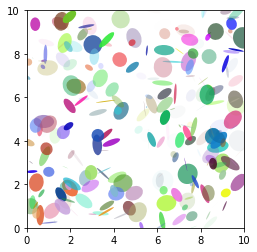

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

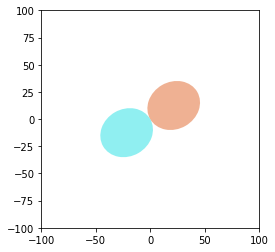

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
theta0deg=theta0*180/math.pi
signs=[1,-1]
ells = [Ellipse(xy=[focus*signi*np.cos(theta0),focus*signi*np.sin(theta0)],
                width=rad0, height=b,
                angle=theta0deg)
                for signi in signs]
                    

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(-2*rad0,2*rad0)
ax.set_ylim(-2*rad0, 2*rad0)

plt.show()

should be overlapping. angle doesn't check out in parametric plot. width=rad0 height=b